In [ ]:
from notebooks import *

In [ ]:
load = Load()
recs = recs if 'recs' in locals() else load.recs(
    # limit=30,  # XXX Faster dev
    datasets=[
        'peterson-field-guide',
        # 'recordings',
    ],
)
display(
    # df_summary(recs).T,
    # df_summary(recs),
    # recs[:5],
)

.

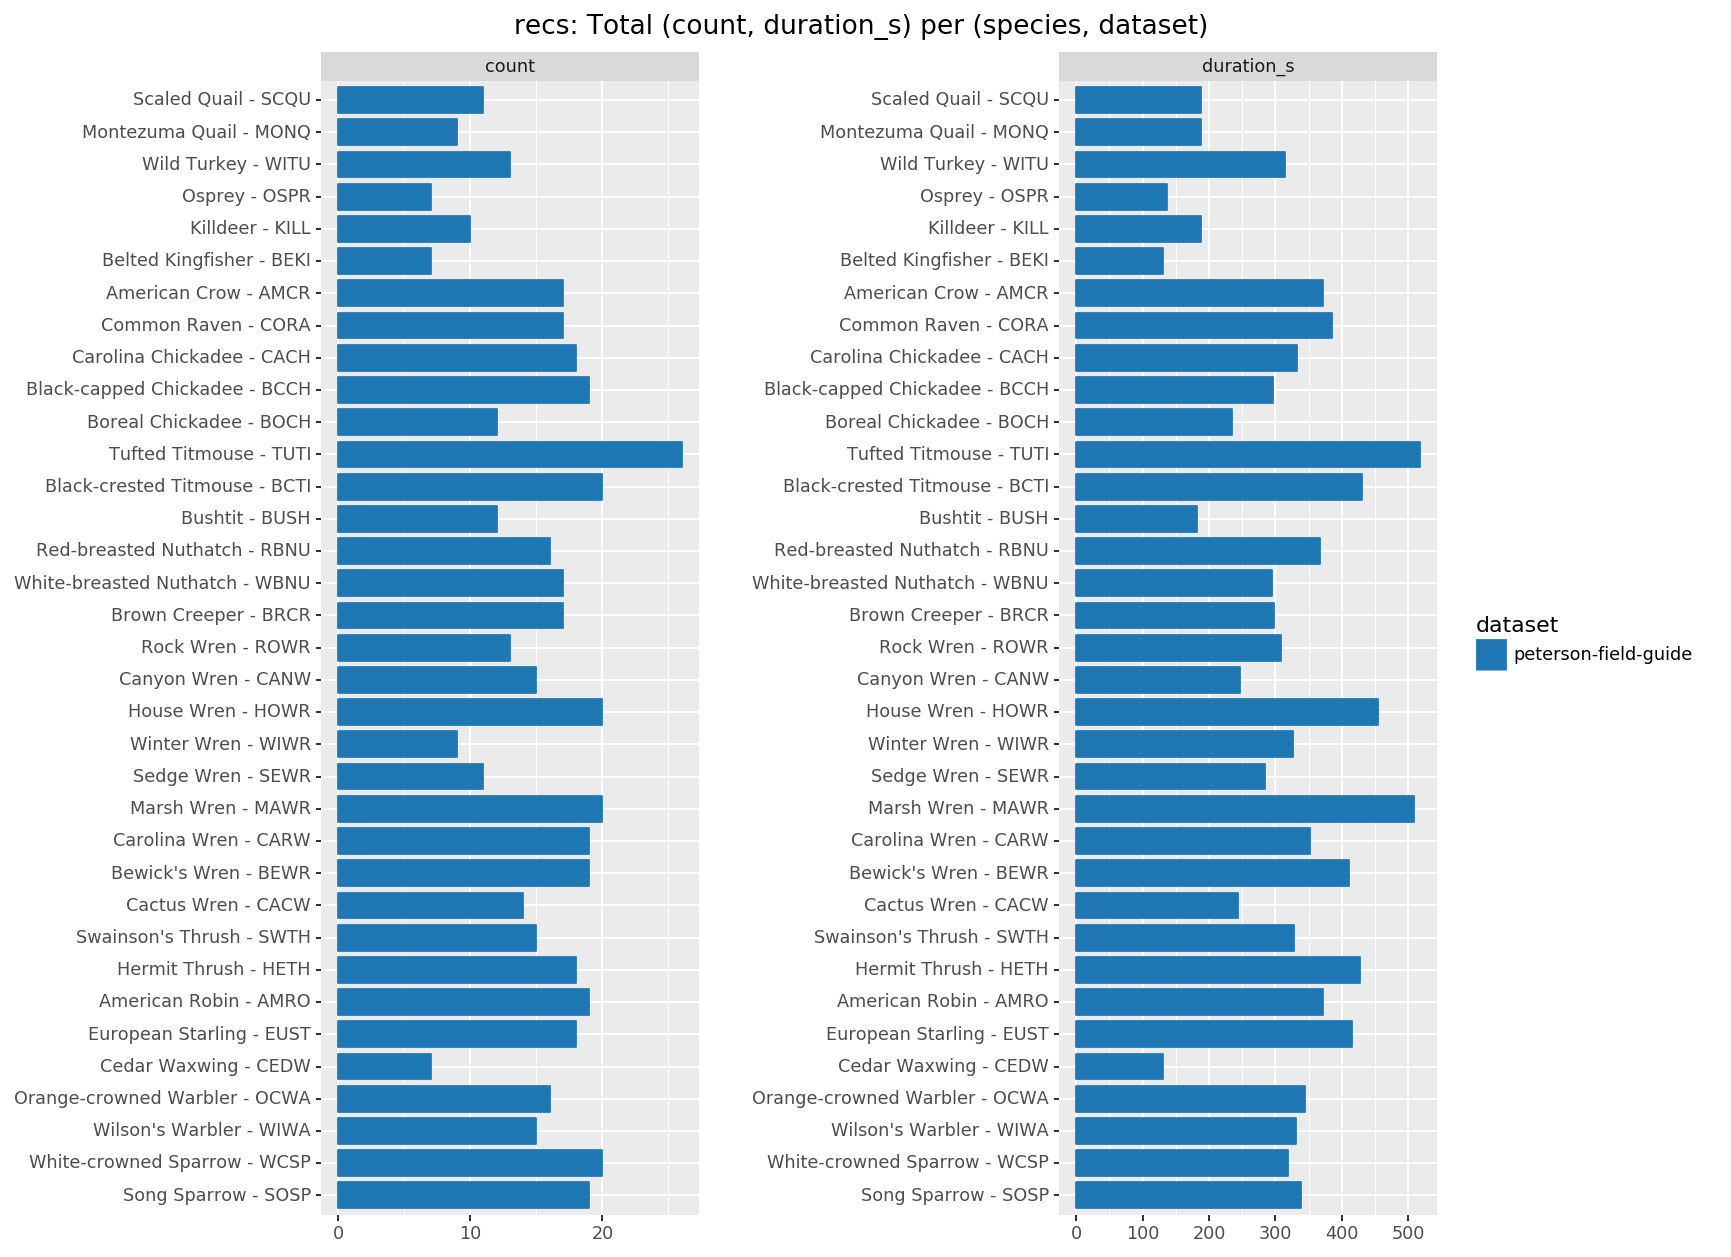

<ggplot: (307704342)>

In [ ]:
(recs
    .assign(species=lambda df: df.species_longhand)
    .assign(count=1)
    # 0-fill all (species, dataset) combinations to create empty placeholders for missing bars
    .pipe(lambda df: df.append(
        pd.DataFrame([
            dict(species=species, dataset=dataset, duration_s=0)
            for species in df.species.unique()
            for dataset in df.dataset.unique()
        ])
        .astype({'species': df.species.dtype})
    ))
    .groupby(['dataset', 'species'])[['count', 'duration_s']].sum().reset_index()
    .pipe(pd.melt, id_vars=['dataset', 'species'], value_vars=['count', 'duration_s'])
    .pipe(df_reverse_cat, 'species')
    .pipe(ggplot, aes(x='species', y='value', fill='dataset', color='dataset'))
    + coord_flip()
    + geom_bar(stat='identity', position=position_dodge(), width=.8)
    + facet_wrap('variable', nrow=1, scales='free')
    + xlab('')
    + ylab('')
    + scale_fill_cmap_d(mpl.cm.tab10)
    + scale_color_cmap_d(mpl.cm.tab10)
    + theme(panel_spacing=2.5)
    + theme_figsize(width=10, aspect_ratio=3/1)
    + ggtitle(f'recs: Total (count, duration_s) per (species, dataset)')
)

In [ ]:
# Load a saved projection model
projection = Projection.load('peterson-v0-26bae1c', features=Features(load=load))

[02:55:03.911] Projection.load
  path: /Users/danb/hack/bubo/data/models/projection/peterson-v0-26bae1c.pkl


In [ ]:
# Add .feat
recs = projection.transform(recs)

.

[                                                                                          ] | 0% Completed |  0.0s

.

.

..

.

.

.

.

.

.

.

.

.

.

.

.

..

.

.

.

.

.

.

.

..

.

.

..

..

..

.

.

..

.

.

.

.

.

.

.

.

.

.

[                                                                                          ] | 0% Completed |  0.1s

.

.

.

.

.

.

.

.

.

..

.

.

..

..

.

.

.

.

.

..

..

.

.

.

..

.

.

..

.

.

.

..

.

.

.

.

.

.

.

.

.

.

[                                                                                          ] | 0% Completed |  0.2s

.

..

.

.

.

.

..

..

.

.

.

.

.

.

.

.

.

.

.

.

.

..

.

.

..

.

.

.

.

.

.

.

.

.

.

.

..

.

.

.

[##################                                                                        ] | 20% Completed |  0.3s

..

.

..

.

..

.

.

.

.

.

.

.

.

.

.

.

..

.

.

.

.

.

.

..

.

..

.

..

.

..

..

.

.

.

.

.

..

.

.

.

.

.

[###################                                                                       ] | 21% Completed |  0.4s

.

.

.

.

..

.

.

.

.

.

.

.

.

.

.

..

.

.

.

..

.

.

.

.

.

.

.

.

.

..

.

..

.

..

..

.

.

..

..

..

[####################################                                                      ] | 41% Completed |  0.5s

.

.

..

..

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

..

.

.

.

.

.

.

..

.

..

.

.

.

.

..

.

.

.

.

.

.

.

.

[####################################                                                      ] | 41% Completed |  0.7s

.

.

..

.

.

..

.

..

..

.

.

.

..

.

.

.

.

.

..

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

..

.

.

.

[#################################################                                         ] | 55% Completed |  0.8s

.

.

.

.

.

..

.

.

.

.

.

.

.

..

.

..

.

.

.

..

.

.

.

..

.

.

.

.

.

.

.

.

..

.

.

..

..

.

.

.

[#######################################################                                   ] | 61% Completed |  0.9s

.

.

.

..

..

.

..

.

.

.

.

.

.

...

.

..

.

.

...

..

.

.

.

.

.

.

.

.

.

.

.

.

.

.

..

.

.

.

.

.

[############################################################                              ] | 66% Completed |  1.0s

.

...

.

.

.

..

.

.

.

..

.

..

.

.

.

..

.

.

.

.

.

.

..

.

.

..

..

.

.

..

.

.

.

.

.

..

.

[############################################################################              ] | 84% Completed |  1.1s

.

.

.

.

.

.

.

.

.

.

.

.

.

..

.

.

.

..

.

..

.

.

..

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

[###################################################################################       ] | 92% Completed |  1.2s

.

.

[##########################################################################################] | 100% Completed |  1.3s

In [ ]:
# GridSearchCV many models / model params
param_grid = dict(
    classifier=[

        # KNN
        #   - Bad for large k because we only have ~7-26 instances per class
        #   - Bad for small k because KNN
        'cls: knn, n_neighbors: 1',
        'cls: knn, n_neighbors: 3',
        'cls: knn, n_neighbors: 5',
        'cls: knn, n_neighbors: 10',
        # 'cls: knn, n_neighbors: 15',
        'cls: knn, n_neighbors: 25',
        # 'cls: knn, n_neighbors: 50',

        # SVM(RBF)
        #   - [SBF16] Uses these
        'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 1',
        'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 10',  # [SBF16]
        'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 100',  # Same as C:10 [why?]
        # 'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 1000',  # Same as C:10 [why?]

        # RandomForest(entropy)
        #   - [SP14] uses entropy
        # 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 10',
        'cls: rf, random_state: 0, criterion: entropy, n_estimators: 50',
        'cls: rf, random_state: 0, criterion: entropy, n_estimators: 100',
        'cls: rf, random_state: 0, criterion: entropy, n_estimators: 200',  # [SP14]
        'cls: rf, random_state: 0, criterion: entropy, n_estimators: 400',

        # RandomForest(gini)
        #   - sk uses gini by default
        # 'cls: rf, random_state: 0, criterion: gini, n_estimators: 10',  # [sk default]
        'cls: rf, random_state: 0, criterion: gini, n_estimators: 50',
        'cls: rf, random_state: 0, criterion: gini, n_estimators: 100',
        'cls: rf, random_state: 0, criterion: gini, n_estimators: 200',
        'cls: rf, random_state: 0, criterion: gini, n_estimators: 400',
        'cls: rf, random_state: 0, criterion: gini, n_estimators: 600',
        'cls: rf, random_state: 0, criterion: gini, n_estimators: 800',
        'cls: rf, random_state: 0, criterion: gini, n_estimators: 1000',

    ]
    # TODO agg_funs
)

# TODO Increase cv to decrease variance in eval metrics (this made Alex extremely squirmy)
cv = GridSearchCVCached(
    estimator=Search(projection=projection),
    param_grid=param_grid,
    # cv=3,  # [SP14] uses two-/three-fold CV [why?]
    cv=sk.model_selection.ShuffleSplit(
        # n_splits=1,
        # n_splits=2,
        # n_splits=5,
        # n_splits=10,
        # n_splits=20,  # Known good
        n_splits=100,  # TODO TODO Fingers crossed this doesn't make the cache fill disk... (58.8g -> 21.9g free)
        test_size=.2,
        random_state=0,
    ),
    return_train_score=True,
    extra_metrics=dict(
        # [How to specify SearchEvals here without creating caching headaches?]
        #   - e.g. defs don't bust cache on code edit
        #   - And avoid thrashing cache every time we refactor SearchEvals
        test_i='i_test',
        test_y='y_test',
        test_classes='estimator.classes_',
        test_predict_proba='estimator.classifier_.predict_proba(X_test)',
    ),
    # return_estimator=True,  # Verrrry heavy, use extra_metrics instead
    # verbose=100,
    # verbose=10,  # O(models * n_splits) lines of outputs
    verbose=1,  # O(1) lines of outputs
    # n_jobs=1,  # For %prun
    # n_jobs=8,
    n_jobs=16,
)
with contextlib.ExitStack() as stack:
    # stack.enter_context(cache_control(refresh=True))
    # stack.enter_context(joblib.parallel_backend('threading'))  # Default: 'multiprocessing'
    # stack.enter_context(joblib.parallel_backend('sequential'))  # For %prun [FIXME Has no effect; why?]
    stack.enter_context(log.context(verbose=False))
    X, y = Search.Xy(recs)
    cv.fit(X, y)

Fitting 100 folds for each of 19 candidates, totalling 1900 fits


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s


!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

[Parallel(n_jobs=16)]: Done 200 tasks      | elapsed:   26.7s


!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

[Parallel(n_jobs=16)]: Done 450 tasks      | elapsed:  1.1min


!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

[Parallel(n_jobs=16)]: Done 800 tasks      | elapsed:  3.7min


!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.62s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

.

.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.84s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

[Parallel(n_jobs=16)]: Done 1250 tasks      | elapsed: 12.3min


!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

.

.

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

.

.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.62s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.51s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 0.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.11s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.15s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.20s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.88s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.84s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.98s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.91s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.02s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.96s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.62s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.47s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.29s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.31s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.99s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.43s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.45s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.48s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.62s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.35s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.35s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.38s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.40s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.38s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.38s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

[Parallel(n_jobs=16)]: Done 1800 tasks      | elapsed: 24.1min


.

.

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.82s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.54s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.35s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.32s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.32s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.35s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.21s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.17s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.19s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 5.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 5.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 5.06s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 5.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 5.16s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 5.10s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 5.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.63s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.23s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.31s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.30s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.32s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.37s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.27s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.28s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.18s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.60s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.57s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


!

!

!

!

/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.07s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 4.03s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.79s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 3.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 2.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.81s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.72s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


/Users/danb/hack/bubo/features/cache.py:98: UserWarning: Persisting input arguments took 1.32s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return func_cached(cache_key, ignore)


[Parallel(n_jobs=16)]: Done 1900 out of 1900 | elapsed: 29.6min finished


!

In [ ]:
# Precompute eval metrics + dims for the plots below
#   - Grain: models
#   - Metrics: train_score, test_score, ...
#   - Dims: model_id, classifier_type, fold, ...
cv_models = (cv_results_splits_df(cv.cv_results_)
    # .params
    .assign(
        # Slow yaml parsing, compute up front
        params_dict=lambda df: df.apply(axis=1, func=lambda row: {
            'classifier': yaml.safe_load('{%s}' % row.param_classifier),
            # TODO More param_*
        }),
        params=lambda df: (
            df.pop('param_classifier')
            # TODO More param_*
        ),
    )
    # Dims from params
    .assign(
        classifier_type=lambda df: df.params_dict.str['classifier'].apply(lambda x: (
            '%s-%s' % (x['cls'], x['criterion']) if x['cls'] == 'rf' else
            x['cls']
        )),
    )
    # .eval
    .assign(test_evals=lambda df: np.vectorize(SearchEvals)(
        i=df.pop('test_i'),
        y=df.pop('test_y'),
        classes=df.pop('test_classes'),
        y_scores=df.pop('test_predict_proba'),
    ))
    # Reorder
    .pipe(df_reorder_cols, first=[
        'model_id', 'params', 'params_dict', 'classifier_type',
    ])
)
display(
    df_summary(cv_models).T,
    cv_models[:5],
)

min                                 25%                                                                      50%                                                                     75%                                                                        max
                dtype   sizeof   len  count nunique mean std                                                                                                                                                                                                                                                                                                    
model_id        object  210410   1900 1900  1900.0  NaN  NaN  cls: knn, n_neighbors: 10; fold: 0  cls: knn, n_neighbors: 5; fold: 76  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 53  cls: rf, random_state: 0, criterion: gini, n_estimators: 600; fold: 30  cls: svm, random_state: 0, probability: true, kernel: rbf, C: 1; fold: 99
params          object  191600   1900 1900  19.0    NaN  NaN            cls: knn, n_neighbors: 1            cls: knn, n_neighbors: 5             cls: rf, random_state: 0, criterion: gini, n_estimators: 100            cls: rf, random_state: 0, criterion: gini, n_estimators: 600          cls: svm, random_state: 0, probability: true, kernel: rbf, C: 100
params_dict     object  456000   1900 1900  NaN     NaN  NaN                                 NaN                                 NaN                                                                      NaN                                                                     NaN                                                                        NaN
classifier_type object  104400   1900 1900  4.0     NaN  NaN                                 knn                                 knn                                                                  rf-gini                                                                 rf-gini                                                                        svm
fold            int64   53124    1900 1900  100.0   NaN  NaN                                   0                                  24                                                                       49                                                                      74                                                                         99
train_score     float64 45600    1900 1900  4.0     NaN  NaN                                  -3                                  -1                                                                       -1                                                                      -1                                                                         -1
test_score      float64 45600    1900 1900  9.0     NaN  NaN                                 -35                                  -5                                                                       -3                                                                      -3                                                                         -2
test_evals      object  64062300 1900 1900  NaN     NaN  NaN                                 NaN                                 NaN                                                                      NaN                                                                     NaN                                                                        NaN

model_id                    params                                       params_dict classifier_type  fold  train_score  test_score                                                              test_evals
0  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     0         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
1  cls: knn, n_neighbors: 1; fold: 1  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     1         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
2  cls: knn, n_neighbors: 1; fold: 2  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     2         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
3  cls: knn, n_neighbors: 1; fold: 3  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     3         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
4  cls: knn, n_neighbors: 1; fold: 4  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     4         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])

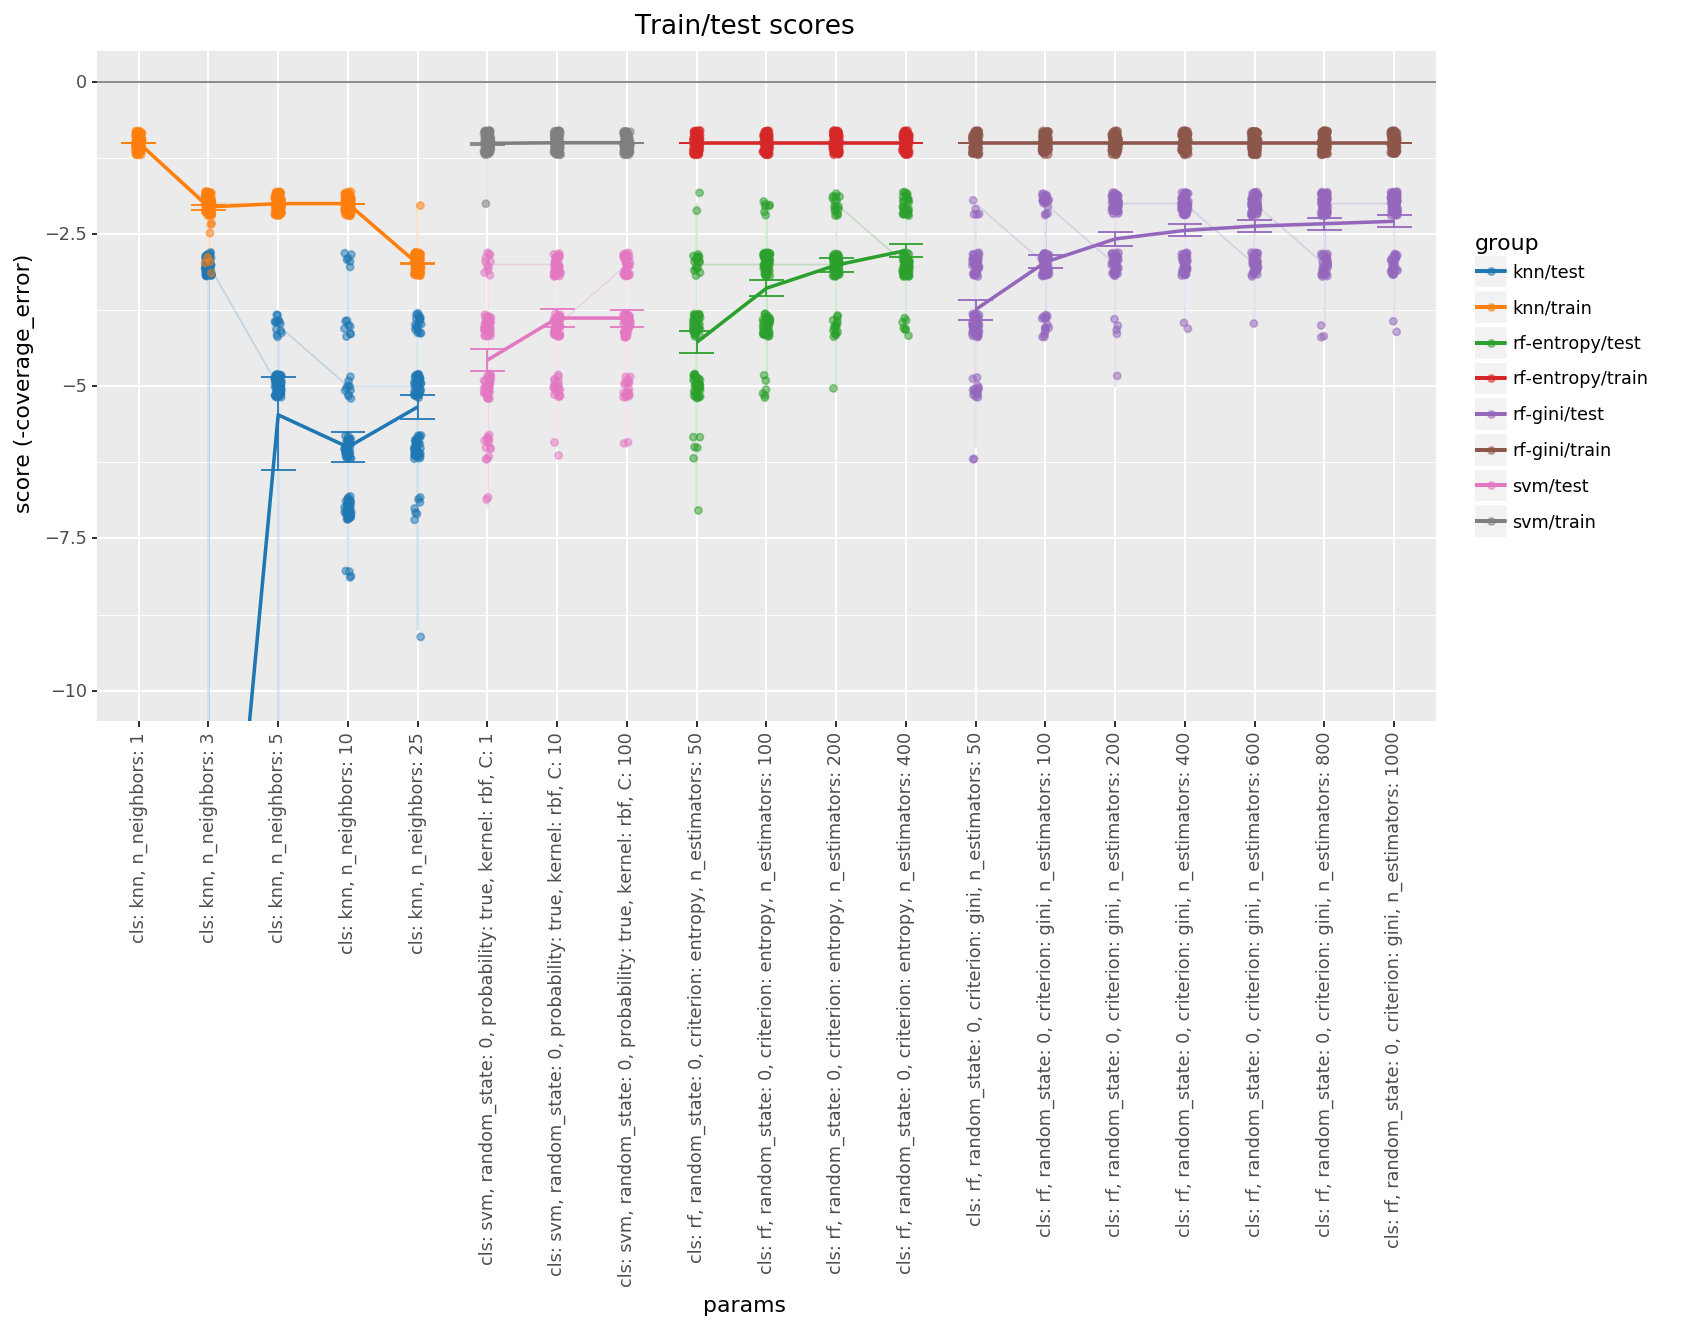

<ggplot: (-9223372036546988656)>

In [ ]:
# Train/test scores
#   - Grain: models x {train,test}
#   - Metrics: score
#   - Dims: group, params
(cv_models
    .pipe(lambda df: pd.melt(
        df,
        id_vars=['classifier_type', 'params', 'fold'],
        value_vars=['train_score', 'test_score'],
        var_name='split',
        value_name='score'),
    )
    .assign(
        split=lambda df: df.split.str.replace('_score', ''),
        group=lambda df: df.apply(axis=1, func=lambda row: row.classifier_type + '/' + row.split),
    )
    .pipe(df_ordered_cat, params=lambda df: param_grid['classifier'])
    .pipe(ggplot, aes(x='params', y='score', color='group'))
    + geom_hline(yintercept=0, color='grey')
    + geom_jitter(alpha=.5, width=.05)
    + geom_line(aes(group='group + str(fold)'), alpha=.2)
    + stat_summary(aes(group='group'), fun_data='mean_cl_boot', random_state=0, geom='errorbar')
    + stat_summary(aes(group='group'), fun_data='mean_cl_boot', random_state=0, geom='line', size=1)
    + scale_color_cmap_d(mpl.cm.tab10)
    + theme(axis_text_x=element_text(angle=90, hjust=.5))
    + theme_figsize(width=12, aspect_ratio=1/2)
    + coord_cartesian(ylim=(-10, 0))
    + ylab('score (-coverage_error)')
    + ggtitle('Train/test scores')
)

# Model diagnostics: all models, all folds

In [ ]:
print('models:')
print('  params[*/%s]' % len(param_grid['classifier']))
print('  fold[*/%s]' % cv.cv.n_splits)

models:
  params[*/19]
  fold[*/100]


In [ ]:
# TODO TODO Bubble down
#   - Subset: all models
#   - Grain: models
#   - Dims: model_id, params, classifier_type, fold, y_true
#   - Metrics: train_score, test_score, test_evals
(cv_models
    [:5]
)

model_id                    params                                       params_dict classifier_type  fold  train_score  test_score                                                              test_evals
0  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     0         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
1  cls: knn, n_neighbors: 1; fold: 1  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     1         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
2  cls: knn, n_neighbors: 1; fold: 2  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     2         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
3  cls: knn, n_neighbors: 1; fold: 3  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     3         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])
4  cls: knn, n_neighbors: 1; fold: 4  cls: knn, n_neighbors: 1  {'classifier': {'cls': 'knn', 'n_neighbors': 1}}             knn     4         -1.0       -35.0  SearchEvals(i[(107,)], y[(107,)], classes[(35,)], y_scores[(107, 35)])

In [ ]:
# TODO Cache
# Coverage errors: all models, all folds
#   - Subset: all models
#   - Grain: sum(recs[model.test_i] for model)
#   - Dims: model_id, params, fold, y_true, rec_id
#   - Metrics: coverage_error
coverage_errors_all_all = (cv_models
    # .sample(n=5, random_state=0)  # For faster dev
    .pipe(lambda df: DF(
        OrderedDict(
            # **row[['model_id', 'params', 'fold']],  # Slow (in this inner loop), unpack manually instead
            model_id=row.model_id,
            params=row.params,
            classifier_type=row.classifier_type,
            fold=row.fold,
            i=i,
            y_true=y_true,
            coverage_error=coverage_error,
        )
        for row in iter_progress(df_rows(df), n=len(df))
        for i, y_true, coverage_error in zip(
            row.test_evals.i,
            row.test_evals.y,
            row.test_evals.coverage_errors(),
        )
    ))
)
display(
    df_summary(coverage_errors_all_all).T,
    coverage_errors_all_all[:10],
)

  0%|                                                                                         | 0/1900 [00:00<?, ?it/s]

  0%|▏                                                                                | 3/1900 [00:00<01:26, 21.89it/s]

  0%|▎                                                                                | 6/1900 [00:00<01:22, 22.87it/s]

  0%|▍                                                                                | 9/1900 [00:00<01:20, 23.47it/s]

  1%|▌                                                                               | 12/1900 [00:00<01:19, 23.62it/s]

  1%|▋                                                                               | 15/1900 [00:00<01:19, 23.85it/s]

  1%|▊                                                                               | 18/1900 [00:00<01:18, 23.87it/s]

  1%|▉                                                                               | 21/1900 [00:00<01:17, 24.15it/s]

  1%|█                                                                               | 24/1900 [00:00<01:16, 24.53it/s]

  1%|█▏                                                                              | 27/1900 [00:01<01:15, 24.94it/s]

  2%|█▎                                                                              | 30/1900 [00:01<01:14, 25.19it/s]

  2%|█▍                                                                              | 33/1900 [00:01<01:13, 25.39it/s]

  2%|█▌                                                                              | 36/1900 [00:01<01:12, 25.66it/s]

  2%|█▋                                                                              | 39/1900 [00:01<01:12, 25.81it/s]

  2%|█▊                                                                              | 42/1900 [00:01<01:11, 25.89it/s]

  2%|█▉                                                                              | 45/1900 [00:01<01:11, 25.96it/s]

  3%|██                                                                              | 48/1900 [00:01<01:11, 25.89it/s]

  3%|██▏                                                                             | 51/1900 [00:01<01:11, 25.90it/s]

  3%|██▎                                                                             | 54/1900 [00:02<01:11, 25.89it/s]

  3%|██▍                                                                             | 57/1900 [00:02<01:11, 25.82it/s]

  3%|██▌                                                                             | 60/1900 [00:02<01:10, 25.93it/s]

  3%|██▋                                                                             | 63/1900 [00:02<01:10, 25.94it/s]

  3%|██▊                                                                             | 66/1900 [00:02<01:10, 25.97it/s]

  4%|██▉                                                                             | 69/1900 [00:02<01:10, 25.98it/s]

  4%|███                                                                             | 72/1900 [00:02<01:10, 25.95it/s]

  4%|███▏                                                                            | 75/1900 [00:02<01:10, 25.92it/s]

  4%|███▎                                                                            | 78/1900 [00:03<01:10, 25.92it/s]

  4%|███▍                                                                            | 81/1900 [00:03<01:09, 25.99it/s]

  4%|███▌                                                                            | 84/1900 [00:03<01:09, 25.99it/s]

  5%|███▋                                                                            | 87/1900 [00:03<01:09, 25.91it/s]

  5%|███▊                                                                            | 90/1900 [00:03<01:09, 25.86it/s]

  5%|███▉                                                                            | 93/1900 [00:03<01:10, 25.79it/s]

  5%|████                                                                            | 96/1900 [00:03<01:10, 25.77it/s]

  5%|████▏                                                                           | 99/1900 [00:03<01:09, 25.73it/s]

  5%|████▏                                                                          | 102/1900 [00:03<01:09, 25.70it/s]

  6%|████▎                                                                          | 105/1900 [00:04<01:10, 25.62it/s]

  6%|████▍                                                                          | 108/1900 [00:04<01:10, 25.55it/s]

  6%|████▌                                                                          | 111/1900 [00:04<01:10, 25.49it/s]

  6%|████▋                                                                          | 114/1900 [00:04<01:10, 25.47it/s]

  6%|████▊                                                                          | 117/1900 [00:04<01:10, 25.42it/s]

  6%|████▉                                                                          | 120/1900 [00:04<01:10, 25.39it/s]

  6%|█████                                                                          | 123/1900 [00:04<01:10, 25.36it/s]

  7%|█████▏                                                                         | 126/1900 [00:04<01:10, 25.34it/s]

  7%|█████▎                                                                         | 129/1900 [00:05<01:09, 25.33it/s]

  7%|█████▍                                                                         | 132/1900 [00:05<01:09, 25.36it/s]

  7%|█████▌                                                                         | 135/1900 [00:05<01:09, 25.40it/s]

  7%|█████▋                                                                         | 138/1900 [00:05<01:09, 25.44it/s]

  7%|█████▊                                                                         | 141/1900 [00:05<01:09, 25.47it/s]

  8%|█████▉                                                                         | 144/1900 [00:05<01:08, 25.48it/s]

  8%|██████                                                                         | 147/1900 [00:05<01:08, 25.49it/s]

  8%|██████▏                                                                        | 150/1900 [00:05<01:08, 25.53it/s]

  8%|██████▎                                                                        | 153/1900 [00:05<01:08, 25.56it/s]

  8%|██████▍                                                                        | 156/1900 [00:06<01:08, 25.60it/s]

  8%|██████▌                                                                        | 159/1900 [00:06<01:07, 25.64it/s]

  9%|██████▋                                                                        | 162/1900 [00:06<01:07, 25.69it/s]

  9%|██████▊                                                                        | 165/1900 [00:06<01:07, 25.72it/s]

  9%|██████▉                                                                        | 168/1900 [00:06<01:07, 25.76it/s]

  9%|███████                                                                        | 171/1900 [00:06<01:07, 25.76it/s]

  9%|███████▏                                                                       | 174/1900 [00:06<01:06, 25.80it/s]

  9%|███████▎                                                                       | 177/1900 [00:06<01:06, 25.82it/s]

  9%|███████▍                                                                       | 180/1900 [00:06<01:06, 25.85it/s]

 10%|███████▌                                                                       | 183/1900 [00:07<01:06, 25.90it/s]

 10%|███████▋                                                                       | 186/1900 [00:07<01:06, 25.92it/s]

 10%|███████▊                                                                       | 189/1900 [00:07<01:06, 25.88it/s]

 10%|███████▉                                                                       | 192/1900 [00:07<01:05, 25.90it/s]

 10%|████████                                                                       | 195/1900 [00:07<01:05, 25.90it/s]

 10%|████████▏                                                                      | 198/1900 [00:07<01:05, 25.92it/s]

 11%|████████▎                                                                      | 201/1900 [00:07<01:05, 25.94it/s]

 11%|████████▍                                                                      | 204/1900 [00:07<01:05, 25.95it/s]

 11%|████████▌                                                                      | 207/1900 [00:07<01:05, 25.97it/s]

 11%|████████▋                                                                      | 210/1900 [00:08<01:05, 25.99it/s]

 11%|████████▊                                                                      | 213/1900 [00:08<01:04, 26.02it/s]

 11%|████████▉                                                                      | 216/1900 [00:08<01:04, 26.02it/s]

 12%|█████████                                                                      | 219/1900 [00:08<01:04, 26.05it/s]

 12%|█████████▏                                                                     | 222/1900 [00:08<01:04, 26.07it/s]

 12%|█████████▎                                                                     | 225/1900 [00:08<01:04, 26.08it/s]

 12%|█████████▍                                                                     | 228/1900 [00:08<01:04, 26.10it/s]

 12%|█████████▌                                                                     | 231/1900 [00:08<01:03, 26.09it/s]

 12%|█████████▋                                                                     | 234/1900 [00:08<01:03, 26.10it/s]

 12%|█████████▊                                                                     | 237/1900 [00:09<01:03, 26.11it/s]

 13%|█████████▉                                                                     | 240/1900 [00:09<01:03, 26.12it/s]

 13%|██████████                                                                     | 243/1900 [00:09<01:03, 26.12it/s]

 13%|██████████▏                                                                    | 246/1900 [00:09<01:03, 26.14it/s]

 13%|██████████▎                                                                    | 249/1900 [00:09<01:03, 26.16it/s]

 13%|██████████▍                                                                    | 252/1900 [00:09<01:02, 26.16it/s]

 13%|██████████▌                                                                    | 255/1900 [00:09<01:02, 26.16it/s]

 14%|██████████▋                                                                    | 258/1900 [00:09<01:02, 26.17it/s]

 14%|██████████▊                                                                    | 261/1900 [00:09<01:02, 26.19it/s]

 14%|██████████▉                                                                    | 264/1900 [00:10<01:02, 26.19it/s]

 14%|███████████                                                                    | 267/1900 [00:10<01:02, 26.20it/s]

 14%|███████████▏                                                                   | 270/1900 [00:10<01:02, 26.17it/s]

 14%|███████████▎                                                                   | 273/1900 [00:10<01:02, 26.18it/s]

 15%|███████████▍                                                                   | 276/1900 [00:10<01:02, 26.18it/s]

 15%|███████████▌                                                                   | 279/1900 [00:10<01:01, 26.18it/s]

 15%|███████████▋                                                                   | 282/1900 [00:10<01:01, 26.18it/s]

 15%|███████████▊                                                                   | 285/1900 [00:10<01:01, 26.18it/s]

 15%|███████████▉                                                                   | 288/1900 [00:10<01:01, 26.18it/s]

 15%|████████████                                                                   | 291/1900 [00:11<01:01, 26.18it/s]

 15%|████████████▏                                                                  | 294/1900 [00:11<01:01, 26.21it/s]

 16%|████████████▎                                                                  | 297/1900 [00:11<01:01, 26.21it/s]

 16%|████████████▍                                                                  | 300/1900 [00:11<01:00, 26.23it/s]

 16%|████████████▌                                                                  | 303/1900 [00:11<01:00, 26.24it/s]

 16%|████████████▋                                                                  | 306/1900 [00:11<01:00, 26.25it/s]

 16%|████████████▊                                                                  | 309/1900 [00:11<01:00, 26.27it/s]

 16%|████████████▉                                                                  | 312/1900 [00:11<01:00, 26.28it/s]

 17%|█████████████                                                                  | 315/1900 [00:11<01:00, 26.28it/s]

 17%|█████████████▏                                                                 | 318/1900 [00:12<01:00, 26.29it/s]

 17%|█████████████▎                                                                 | 321/1900 [00:12<01:00, 26.30it/s]

 17%|█████████████▍                                                                 | 324/1900 [00:12<00:59, 26.31it/s]

 17%|█████████████▌                                                                 | 327/1900 [00:12<00:59, 26.31it/s]

 17%|█████████████▋                                                                 | 330/1900 [00:12<00:59, 26.32it/s]

 18%|█████████████▊                                                                 | 333/1900 [00:12<00:59, 26.32it/s]

 18%|█████████████▉                                                                 | 336/1900 [00:12<00:59, 26.32it/s]

 18%|██████████████                                                                 | 339/1900 [00:12<00:59, 26.33it/s]

 18%|██████████████▏                                                                | 342/1900 [00:12<00:59, 26.33it/s]

 18%|██████████████▎                                                                | 345/1900 [00:13<00:59, 26.34it/s]

 18%|██████████████▍                                                                | 348/1900 [00:13<00:58, 26.34it/s]

 18%|██████████████▌                                                                | 351/1900 [00:13<00:58, 26.35it/s]

 19%|██████████████▋                                                                | 354/1900 [00:13<00:58, 26.36it/s]

 19%|██████████████▊                                                                | 357/1900 [00:13<00:58, 26.36it/s]

 19%|██████████████▉                                                                | 360/1900 [00:13<00:58, 26.36it/s]

 19%|███████████████                                                                | 363/1900 [00:13<00:58, 26.37it/s]

 19%|███████████████▏                                                               | 366/1900 [00:13<00:58, 26.39it/s]

 19%|███████████████▎                                                               | 369/1900 [00:13<00:57, 26.41it/s]

 20%|███████████████▍                                                               | 372/1900 [00:14<00:57, 26.41it/s]

 20%|███████████████▌                                                               | 375/1900 [00:14<00:57, 26.41it/s]

 20%|███████████████▋                                                               | 378/1900 [00:14<00:57, 26.42it/s]

 20%|███████████████▊                                                               | 381/1900 [00:14<00:57, 26.44it/s]

 20%|███████████████▉                                                               | 384/1900 [00:14<00:57, 26.45it/s]

 20%|████████████████                                                               | 387/1900 [00:14<00:57, 26.47it/s]

 21%|████████████████▏                                                              | 390/1900 [00:14<00:57, 26.48it/s]

 21%|████████████████▎                                                              | 393/1900 [00:14<00:56, 26.49it/s]

 21%|████████████████▍                                                              | 396/1900 [00:14<00:56, 26.51it/s]

 21%|████████████████▌                                                              | 399/1900 [00:15<00:56, 26.52it/s]

 21%|████████████████▋                                                              | 402/1900 [00:15<00:56, 26.53it/s]

 21%|████████████████▊                                                              | 405/1900 [00:15<00:56, 26.52it/s]

 21%|████████████████▉                                                              | 408/1900 [00:15<00:56, 26.53it/s]

 22%|█████████████████                                                              | 411/1900 [00:15<00:56, 26.50it/s]

 22%|█████████████████▏                                                             | 414/1900 [00:15<00:56, 26.48it/s]

 22%|█████████████████▎                                                             | 417/1900 [00:15<00:55, 26.50it/s]

 22%|█████████████████▍                                                             | 420/1900 [00:15<00:55, 26.50it/s]

 22%|█████████████████▌                                                             | 423/1900 [00:15<00:55, 26.51it/s]

 22%|█████████████████▋                                                             | 426/1900 [00:16<00:55, 26.51it/s]

 23%|█████████████████▊                                                             | 429/1900 [00:16<00:55, 26.52it/s]

 23%|█████████████████▉                                                             | 432/1900 [00:16<00:55, 26.53it/s]

 23%|██████████████████                                                             | 435/1900 [00:16<00:55, 26.53it/s]

 23%|██████████████████▏                                                            | 438/1900 [00:16<00:55, 26.53it/s]

 23%|██████████████████▎                                                            | 441/1900 [00:16<00:54, 26.54it/s]

 23%|██████████████████▍                                                            | 444/1900 [00:16<00:54, 26.55it/s]

 24%|██████████████████▌                                                            | 447/1900 [00:16<00:54, 26.54it/s]

 24%|██████████████████▋                                                            | 450/1900 [00:16<00:54, 26.54it/s]

 24%|██████████████████▊                                                            | 453/1900 [00:17<00:54, 26.54it/s]

 24%|██████████████████▉                                                            | 456/1900 [00:17<00:54, 26.53it/s]

 24%|███████████████████                                                            | 459/1900 [00:17<00:54, 26.53it/s]

 24%|███████████████████▏                                                           | 462/1900 [00:17<00:54, 26.52it/s]

 24%|███████████████████▎                                                           | 465/1900 [00:17<00:54, 26.52it/s]

 25%|███████████████████▍                                                           | 468/1900 [00:17<00:53, 26.53it/s]

 25%|███████████████████▌                                                           | 471/1900 [00:17<00:53, 26.53it/s]

 25%|███████████████████▋                                                           | 474/1900 [00:17<00:53, 26.54it/s]

 25%|███████████████████▊                                                           | 477/1900 [00:17<00:53, 26.55it/s]

 25%|███████████████████▉                                                           | 480/1900 [00:18<00:53, 26.56it/s]

 25%|████████████████████                                                           | 483/1900 [00:18<00:53, 26.57it/s]

 26%|████████████████████▏                                                          | 486/1900 [00:18<00:53, 26.58it/s]

 26%|████████████████████▎                                                          | 489/1900 [00:18<00:53, 26.58it/s]

 26%|████████████████████▍                                                          | 492/1900 [00:18<00:52, 26.59it/s]

 26%|████████████████████▌                                                          | 495/1900 [00:18<00:52, 26.57it/s]

 26%|████████████████████▋                                                          | 498/1900 [00:18<00:52, 26.57it/s]

 26%|████████████████████▊                                                          | 501/1900 [00:18<00:52, 26.57it/s]

 27%|████████████████████▉                                                          | 504/1900 [00:18<00:52, 26.57it/s]

 27%|█████████████████████                                                          | 507/1900 [00:19<00:52, 26.57it/s]

 27%|█████████████████████▏                                                         | 510/1900 [00:19<00:52, 26.59it/s]

 27%|█████████████████████▎                                                         | 513/1900 [00:19<00:52, 26.59it/s]

 27%|█████████████████████▍                                                         | 516/1900 [00:19<00:52, 26.60it/s]

 27%|█████████████████████▌                                                         | 519/1900 [00:19<00:51, 26.60it/s]

 27%|█████████████████████▋                                                         | 522/1900 [00:19<00:51, 26.60it/s]

 28%|█████████████████████▊                                                         | 525/1900 [00:19<00:51, 26.60it/s]

 28%|█████████████████████▉                                                         | 528/1900 [00:19<00:51, 26.61it/s]

 28%|██████████████████████                                                         | 531/1900 [00:19<00:51, 26.61it/s]

 28%|██████████████████████▏                                                        | 534/1900 [00:20<00:51, 26.61it/s]

 28%|██████████████████████▎                                                        | 537/1900 [00:20<00:51, 26.61it/s]

 28%|██████████████████████▍                                                        | 540/1900 [00:20<00:51, 26.63it/s]

 29%|██████████████████████▌                                                        | 543/1900 [00:20<00:50, 26.64it/s]

 29%|██████████████████████▋                                                        | 546/1900 [00:20<00:50, 26.65it/s]

 29%|██████████████████████▊                                                        | 549/1900 [00:20<00:50, 26.64it/s]

 29%|██████████████████████▉                                                        | 552/1900 [00:20<00:50, 26.64it/s]

 29%|███████████████████████                                                        | 555/1900 [00:20<00:50, 26.63it/s]

 29%|███████████████████████▏                                                       | 558/1900 [00:20<00:50, 26.63it/s]

 30%|███████████████████████▎                                                       | 561/1900 [00:21<00:50, 26.64it/s]

 30%|███████████████████████▍                                                       | 564/1900 [00:21<00:50, 26.64it/s]

 30%|███████████████████████▌                                                       | 567/1900 [00:21<00:50, 26.63it/s]

 30%|███████████████████████▋                                                       | 570/1900 [00:21<00:49, 26.64it/s]

 30%|███████████████████████▊                                                       | 573/1900 [00:21<00:49, 26.63it/s]

 30%|███████████████████████▉                                                       | 576/1900 [00:21<00:49, 26.64it/s]

 30%|████████████████████████                                                       | 579/1900 [00:21<00:49, 26.64it/s]

 31%|████████████████████████▏                                                      | 582/1900 [00:21<00:49, 26.64it/s]

 31%|████████████████████████▎                                                      | 585/1900 [00:21<00:49, 26.64it/s]

 31%|████████████████████████▍                                                      | 588/1900 [00:22<00:49, 26.64it/s]

 31%|████████████████████████▌                                                      | 591/1900 [00:22<00:49, 26.65it/s]

 31%|████████████████████████▋                                                      | 594/1900 [00:22<00:49, 26.64it/s]

 31%|████████████████████████▊                                                      | 597/1900 [00:22<00:48, 26.64it/s]

 32%|████████████████████████▉                                                      | 600/1900 [00:22<00:48, 26.65it/s]

 32%|█████████████████████████                                                      | 603/1900 [00:22<00:48, 26.65it/s]

 32%|█████████████████████████▏                                                     | 606/1900 [00:22<00:48, 26.64it/s]

 32%|█████████████████████████▎                                                     | 609/1900 [00:22<00:48, 26.64it/s]

 32%|█████████████████████████▍                                                     | 612/1900 [00:22<00:48, 26.64it/s]

 32%|█████████████████████████▌                                                     | 615/1900 [00:23<00:48, 26.63it/s]

 33%|█████████████████████████▋                                                     | 618/1900 [00:23<00:48, 26.63it/s]

 33%|█████████████████████████▊                                                     | 621/1900 [00:23<00:48, 26.63it/s]

 33%|█████████████████████████▉                                                     | 624/1900 [00:23<00:47, 26.62it/s]

 33%|██████████████████████████                                                     | 627/1900 [00:23<00:47, 26.62it/s]

 33%|██████████████████████████▏                                                    | 630/1900 [00:23<00:47, 26.62it/s]

 33%|██████████████████████████▎                                                    | 633/1900 [00:23<00:47, 26.61it/s]

 33%|██████████████████████████▍                                                    | 636/1900 [00:23<00:47, 26.62it/s]

 34%|██████████████████████████▌                                                    | 639/1900 [00:24<00:47, 26.62it/s]

 34%|██████████████████████████▋                                                    | 642/1900 [00:24<00:47, 26.62it/s]

 34%|██████████████████████████▊                                                    | 645/1900 [00:24<00:47, 26.61it/s]

 34%|██████████████████████████▉                                                    | 648/1900 [00:24<00:47, 26.61it/s]

 34%|███████████████████████████                                                    | 651/1900 [00:24<00:46, 26.61it/s]

 34%|███████████████████████████▏                                                   | 654/1900 [00:24<00:46, 26.60it/s]

 35%|███████████████████████████▎                                                   | 657/1900 [00:24<00:46, 26.60it/s]

 35%|███████████████████████████▍                                                   | 660/1900 [00:24<00:46, 26.59it/s]

 35%|███████████████████████████▌                                                   | 663/1900 [00:24<00:46, 26.59it/s]

 35%|███████████████████████████▋                                                   | 666/1900 [00:25<00:46, 26.60it/s]

 35%|███████████████████████████▊                                                   | 669/1900 [00:25<00:46, 26.60it/s]

 35%|███████████████████████████▉                                                   | 672/1900 [00:25<00:46, 26.61it/s]

 36%|████████████████████████████                                                   | 675/1900 [00:25<00:46, 26.61it/s]

 36%|████████████████████████████▏                                                  | 678/1900 [00:25<00:45, 26.60it/s]

 36%|████████████████████████████▎                                                  | 681/1900 [00:25<00:45, 26.60it/s]

 36%|████████████████████████████▍                                                  | 684/1900 [00:25<00:45, 26.60it/s]

 36%|████████████████████████████▌                                                  | 687/1900 [00:25<00:45, 26.60it/s]

 36%|████████████████████████████▋                                                  | 690/1900 [00:25<00:45, 26.60it/s]

 36%|████████████████████████████▊                                                  | 693/1900 [00:26<00:45, 26.60it/s]

 37%|████████████████████████████▉                                                  | 696/1900 [00:26<00:45, 26.61it/s]

 37%|█████████████████████████████                                                  | 699/1900 [00:26<00:45, 26.62it/s]

 37%|█████████████████████████████▏                                                 | 702/1900 [00:26<00:45, 26.62it/s]

 37%|█████████████████████████████▎                                                 | 705/1900 [00:26<00:44, 26.63it/s]

 37%|█████████████████████████████▍                                                 | 708/1900 [00:26<00:44, 26.63it/s]

 37%|█████████████████████████████▌                                                 | 711/1900 [00:26<00:44, 26.63it/s]

 38%|█████████████████████████████▋                                                 | 714/1900 [00:26<00:44, 26.62it/s]

 38%|█████████████████████████████▊                                                 | 717/1900 [00:26<00:44, 26.63it/s]

 38%|█████████████████████████████▉                                                 | 720/1900 [00:27<00:44, 26.63it/s]

 38%|██████████████████████████████                                                 | 723/1900 [00:27<00:44, 26.64it/s]

 38%|██████████████████████████████▏                                                | 726/1900 [00:27<00:44, 26.64it/s]

 38%|██████████████████████████████▎                                                | 729/1900 [00:27<00:43, 26.64it/s]

 39%|██████████████████████████████▍                                                | 732/1900 [00:27<00:43, 26.64it/s]

 39%|██████████████████████████████▌                                                | 735/1900 [00:27<00:43, 26.64it/s]

 39%|██████████████████████████████▋                                                | 738/1900 [00:27<00:43, 26.64it/s]

 39%|██████████████████████████████▊                                                | 741/1900 [00:27<00:43, 26.64it/s]

 39%|██████████████████████████████▉                                                | 744/1900 [00:27<00:43, 26.64it/s]

 39%|███████████████████████████████                                                | 747/1900 [00:28<00:43, 26.64it/s]

 39%|███████████████████████████████▏                                               | 750/1900 [00:28<00:43, 26.64it/s]

 40%|███████████████████████████████▎                                               | 753/1900 [00:28<00:43, 26.65it/s]

 40%|███████████████████████████████▍                                               | 756/1900 [00:28<00:42, 26.66it/s]

 40%|███████████████████████████████▌                                               | 759/1900 [00:28<00:42, 26.65it/s]

 40%|███████████████████████████████▋                                               | 762/1900 [00:28<00:42, 26.65it/s]

 40%|███████████████████████████████▊                                               | 765/1900 [00:28<00:42, 26.64it/s]

 40%|███████████████████████████████▉                                               | 768/1900 [00:28<00:42, 26.64it/s]

 41%|████████████████████████████████                                               | 771/1900 [00:28<00:42, 26.64it/s]

 41%|████████████████████████████████▏                                              | 774/1900 [00:29<00:42, 26.64it/s]

 41%|████████████████████████████████▎                                              | 777/1900 [00:29<00:42, 26.64it/s]

 41%|████████████████████████████████▍                                              | 780/1900 [00:29<00:42, 26.64it/s]

 41%|████████████████████████████████▌                                              | 783/1900 [00:29<00:41, 26.65it/s]

 41%|████████████████████████████████▋                                              | 786/1900 [00:29<00:41, 26.65it/s]

 42%|████████████████████████████████▊                                              | 789/1900 [00:29<00:41, 26.63it/s]

 42%|████████████████████████████████▉                                              | 792/1900 [00:29<00:41, 26.62it/s]

 42%|█████████████████████████████████                                              | 795/1900 [00:29<00:41, 26.61it/s]

 42%|█████████████████████████████████▏                                             | 798/1900 [00:29<00:41, 26.61it/s]

 42%|█████████████████████████████████▎                                             | 801/1900 [00:30<00:41, 26.60it/s]

 42%|█████████████████████████████████▍                                             | 804/1900 [00:30<00:41, 26.60it/s]

 42%|█████████████████████████████████▌                                             | 807/1900 [00:30<00:41, 26.60it/s]

 43%|█████████████████████████████████▋                                             | 810/1900 [00:30<00:40, 26.60it/s]

 43%|█████████████████████████████████▊                                             | 813/1900 [00:30<00:40, 26.61it/s]

 43%|█████████████████████████████████▉                                             | 816/1900 [00:30<00:40, 26.62it/s]

 43%|██████████████████████████████████                                             | 819/1900 [00:30<00:40, 26.62it/s]

 43%|██████████████████████████████████▏                                            | 822/1900 [00:30<00:40, 26.62it/s]

 43%|██████████████████████████████████▎                                            | 825/1900 [00:30<00:40, 26.63it/s]

 44%|██████████████████████████████████▍                                            | 828/1900 [00:31<00:40, 26.63it/s]

 44%|██████████████████████████████████▌                                            | 831/1900 [00:31<00:40, 26.63it/s]

 44%|██████████████████████████████████▋                                            | 834/1900 [00:31<00:40, 26.63it/s]

 44%|██████████████████████████████████▊                                            | 837/1900 [00:31<00:39, 26.64it/s]

 44%|██████████████████████████████████▉                                            | 840/1900 [00:31<00:39, 26.64it/s]

 44%|███████████████████████████████████                                            | 843/1900 [00:31<00:39, 26.64it/s]

 45%|███████████████████████████████████▏                                           | 846/1900 [00:31<00:39, 26.65it/s]

 45%|███████████████████████████████████▎                                           | 849/1900 [00:31<00:39, 26.65it/s]

 45%|███████████████████████████████████▍                                           | 852/1900 [00:31<00:39, 26.65it/s]

 45%|███████████████████████████████████▌                                           | 855/1900 [00:32<00:39, 26.63it/s]

 45%|███████████████████████████████████▋                                           | 858/1900 [00:32<00:39, 26.64it/s]

 45%|███████████████████████████████████▊                                           | 861/1900 [00:32<00:39, 26.64it/s]

 45%|███████████████████████████████████▉                                           | 864/1900 [00:32<00:38, 26.64it/s]

 46%|████████████████████████████████████                                           | 867/1900 [00:32<00:38, 26.64it/s]

 46%|████████████████████████████████████▏                                          | 870/1900 [00:32<00:38, 26.64it/s]

 46%|████████████████████████████████████▎                                          | 873/1900 [00:32<00:38, 26.64it/s]

 46%|████████████████████████████████████▍                                          | 876/1900 [00:32<00:38, 26.64it/s]

 46%|████████████████████████████████████▌                                          | 879/1900 [00:32<00:38, 26.64it/s]

 46%|████████████████████████████████████▋                                          | 882/1900 [00:33<00:38, 26.64it/s]

 47%|████████████████████████████████████▊                                          | 885/1900 [00:33<00:38, 26.63it/s]

 47%|████████████████████████████████████▉                                          | 888/1900 [00:33<00:37, 26.63it/s]

 47%|█████████████████████████████████████                                          | 891/1900 [00:33<00:37, 26.63it/s]

 47%|█████████████████████████████████████▏                                         | 894/1900 [00:33<00:37, 26.63it/s]

 47%|█████████████████████████████████████▎                                         | 897/1900 [00:33<00:37, 26.63it/s]

 47%|█████████████████████████████████████▍                                         | 900/1900 [00:33<00:37, 26.63it/s]

 48%|█████████████████████████████████████▌                                         | 903/1900 [00:33<00:37, 26.63it/s]

 48%|█████████████████████████████████████▋                                         | 906/1900 [00:34<00:37, 26.63it/s]

 48%|█████████████████████████████████████▊                                         | 909/1900 [00:34<00:37, 26.63it/s]

 48%|█████████████████████████████████████▉                                         | 912/1900 [00:34<00:37, 26.63it/s]

 48%|██████████████████████████████████████                                         | 915/1900 [00:34<00:36, 26.63it/s]

 48%|██████████████████████████████████████▏                                        | 918/1900 [00:34<00:36, 26.63it/s]

 48%|██████████████████████████████████████▎                                        | 921/1900 [00:34<00:36, 26.63it/s]

 49%|██████████████████████████████████████▍                                        | 924/1900 [00:34<00:36, 26.63it/s]

 49%|██████████████████████████████████████▌                                        | 927/1900 [00:34<00:36, 26.63it/s]

 49%|██████████████████████████████████████▋                                        | 930/1900 [00:34<00:36, 26.63it/s]

 49%|██████████████████████████████████████▊                                        | 933/1900 [00:35<00:36, 26.63it/s]

 49%|██████████████████████████████████████▉                                        | 936/1900 [00:35<00:36, 26.64it/s]

 49%|███████████████████████████████████████                                        | 939/1900 [00:35<00:36, 26.63it/s]

 50%|███████████████████████████████████████▏                                       | 942/1900 [00:35<00:35, 26.63it/s]

 50%|███████████████████████████████████████▎                                       | 945/1900 [00:35<00:35, 26.63it/s]

 50%|███████████████████████████████████████▍                                       | 948/1900 [00:35<00:35, 26.63it/s]

 50%|███████████████████████████████████████▌                                       | 951/1900 [00:35<00:35, 26.63it/s]

 50%|███████████████████████████████████████▋                                       | 954/1900 [00:35<00:35, 26.63it/s]

 50%|███████████████████████████████████████▊                                       | 957/1900 [00:35<00:35, 26.64it/s]

 51%|███████████████████████████████████████▉                                       | 960/1900 [00:36<00:35, 26.64it/s]

 51%|████████████████████████████████████████                                       | 963/1900 [00:36<00:35, 26.64it/s]

 51%|████████████████████████████████████████▏                                      | 966/1900 [00:36<00:35, 26.64it/s]

 51%|████████████████████████████████████████▎                                      | 969/1900 [00:36<00:34, 26.64it/s]

 51%|████████████████████████████████████████▍                                      | 972/1900 [00:36<00:34, 26.63it/s]

 51%|████████████████████████████████████████▌                                      | 975/1900 [00:36<00:34, 26.63it/s]

 51%|████████████████████████████████████████▋                                      | 978/1900 [00:36<00:34, 26.63it/s]

 52%|████████████████████████████████████████▊                                      | 981/1900 [00:36<00:34, 26.63it/s]

 52%|████████████████████████████████████████▉                                      | 984/1900 [00:36<00:34, 26.62it/s]

 52%|█████████████████████████████████████████                                      | 987/1900 [00:37<00:34, 26.62it/s]

 52%|█████████████████████████████████████████▏                                     | 990/1900 [00:37<00:34, 26.62it/s]

 52%|█████████████████████████████████████████▎                                     | 993/1900 [00:37<00:34, 26.62it/s]

 52%|█████████████████████████████████████████▍                                     | 996/1900 [00:37<00:33, 26.62it/s]

 53%|█████████████████████████████████████████▌                                     | 999/1900 [00:37<00:33, 26.63it/s]

 53%|█████████████████████████████████████████▏                                    | 1002/1900 [00:37<00:33, 26.62it/s]

 53%|█████████████████████████████████████████▎                                    | 1005/1900 [00:37<00:33, 26.62it/s]

 53%|█████████████████████████████████████████▍                                    | 1008/1900 [00:37<00:33, 26.62it/s]

 53%|█████████████████████████████████████████▌                                    | 1011/1900 [00:37<00:33, 26.62it/s]

 53%|█████████████████████████████████████████▋                                    | 1014/1900 [00:38<00:33, 26.61it/s]

 54%|█████████████████████████████████████████▊                                    | 1017/1900 [00:38<00:33, 26.61it/s]

 54%|█████████████████████████████████████████▊                                    | 1020/1900 [00:38<00:33, 26.60it/s]

 54%|█████████████████████████████████████████▉                                    | 1023/1900 [00:38<00:32, 26.60it/s]

 54%|██████████████████████████████████████████                                    | 1026/1900 [00:38<00:32, 26.60it/s]

 54%|██████████████████████████████████████████▏                                   | 1029/1900 [00:38<00:32, 26.60it/s]

 54%|██████████████████████████████████████████▎                                   | 1032/1900 [00:38<00:32, 26.60it/s]

 54%|██████████████████████████████████████████▍                                   | 1035/1900 [00:38<00:32, 26.60it/s]

 55%|██████████████████████████████████████████▌                                   | 1038/1900 [00:39<00:32, 26.60it/s]

 55%|██████████████████████████████████████████▋                                   | 1041/1900 [00:39<00:32, 26.61it/s]

 55%|██████████████████████████████████████████▊                                   | 1044/1900 [00:39<00:32, 26.61it/s]

 55%|██████████████████████████████████████████▉                                   | 1047/1900 [00:39<00:32, 26.61it/s]

 55%|███████████████████████████████████████████                                   | 1050/1900 [00:39<00:31, 26.61it/s]

 55%|███████████████████████████████████████████▏                                  | 1053/1900 [00:39<00:31, 26.62it/s]

 56%|███████████████████████████████████████████▎                                  | 1056/1900 [00:39<00:31, 26.53it/s]

 56%|███████████████████████████████████████████▍                                  | 1059/1900 [00:39<00:31, 26.53it/s]

 56%|███████████████████████████████████████████▌                                  | 1062/1900 [00:40<00:31, 26.53it/s]

 56%|███████████████████████████████████████████▋                                  | 1065/1900 [00:40<00:31, 26.53it/s]

 56%|███████████████████████████████████████████▊                                  | 1068/1900 [00:40<00:31, 26.53it/s]

 56%|███████████████████████████████████████████▉                                  | 1071/1900 [00:40<00:31, 26.53it/s]

 57%|████████████████████████████████████████████                                  | 1074/1900 [00:40<00:31, 26.53it/s]

 57%|████████████████████████████████████████████▏                                 | 1077/1900 [00:40<00:31, 26.53it/s]

 57%|████████████████████████████████████████████▎                                 | 1080/1900 [00:40<00:30, 26.53it/s]

 57%|████████████████████████████████████████████▍                                 | 1083/1900 [00:40<00:30, 26.53it/s]

 57%|████████████████████████████████████████████▌                                 | 1086/1900 [00:40<00:30, 26.53it/s]

 57%|████████████████████████████████████████████▋                                 | 1089/1900 [00:41<00:30, 26.53it/s]

 57%|████████████████████████████████████████████▊                                 | 1092/1900 [00:41<00:30, 26.53it/s]

 58%|████████████████████████████████████████████▉                                 | 1095/1900 [00:41<00:30, 26.53it/s]

 58%|█████████████████████████████████████████████                                 | 1098/1900 [00:41<00:30, 26.53it/s]

 58%|█████████████████████████████████████████████▏                                | 1101/1900 [00:41<00:30, 26.53it/s]

 58%|█████████████████████████████████████████████▎                                | 1104/1900 [00:41<00:30, 26.53it/s]

 58%|█████████████████████████████████████████████▍                                | 1107/1900 [00:41<00:29, 26.54it/s]

 58%|█████████████████████████████████████████████▌                                | 1110/1900 [00:41<00:29, 26.54it/s]

 59%|█████████████████████████████████████████████▋                                | 1113/1900 [00:41<00:29, 26.55it/s]

 59%|█████████████████████████████████████████████▊                                | 1116/1900 [00:42<00:29, 26.55it/s]

 59%|█████████████████████████████████████████████▉                                | 1119/1900 [00:42<00:29, 26.55it/s]

 59%|██████████████████████████████████████████████                                | 1122/1900 [00:42<00:29, 26.55it/s]

 59%|██████████████████████████████████████████████▏                               | 1125/1900 [00:42<00:29, 26.55it/s]

 59%|██████████████████████████████████████████████▎                               | 1128/1900 [00:42<00:29, 26.56it/s]

 60%|██████████████████████████████████████████████▍                               | 1131/1900 [00:42<00:28, 26.56it/s]

 60%|██████████████████████████████████████████████▌                               | 1134/1900 [00:42<00:28, 26.56it/s]

 60%|██████████████████████████████████████████████▋                               | 1137/1900 [00:42<00:28, 26.56it/s]

 60%|██████████████████████████████████████████████▊                               | 1140/1900 [00:42<00:28, 26.56it/s]

 60%|██████████████████████████████████████████████▉                               | 1143/1900 [00:43<00:28, 26.56it/s]

 60%|███████████████████████████████████████████████                               | 1146/1900 [00:43<00:28, 26.56it/s]

 60%|███████████████████████████████████████████████▏                              | 1149/1900 [00:43<00:28, 26.56it/s]

 61%|███████████████████████████████████████████████▎                              | 1152/1900 [00:43<00:28, 26.56it/s]

 61%|███████████████████████████████████████████████▍                              | 1155/1900 [00:43<00:28, 26.56it/s]

 61%|███████████████████████████████████████████████▌                              | 1158/1900 [00:43<00:27, 26.56it/s]

 61%|███████████████████████████████████████████████▋                              | 1161/1900 [00:43<00:27, 26.56it/s]

 61%|███████████████████████████████████████████████▊                              | 1164/1900 [00:43<00:27, 26.56it/s]

 61%|███████████████████████████████████████████████▉                              | 1167/1900 [00:43<00:27, 26.56it/s]

 62%|████████████████████████████████████████████████                              | 1170/1900 [00:44<00:27, 26.56it/s]

 62%|████████████████████████████████████████████████▏                             | 1173/1900 [00:44<00:27, 26.56it/s]

 62%|████████████████████████████████████████████████▎                             | 1176/1900 [00:44<00:27, 26.56it/s]

 62%|████████████████████████████████████████████████▍                             | 1179/1900 [00:44<00:27, 26.56it/s]

 62%|████████████████████████████████████████████████▌                             | 1182/1900 [00:44<00:27, 26.56it/s]

 62%|████████████████████████████████████████████████▋                             | 1185/1900 [00:44<00:26, 26.56it/s]

 63%|████████████████████████████████████████████████▊                             | 1188/1900 [00:44<00:26, 26.56it/s]

 63%|████████████████████████████████████████████████▉                             | 1191/1900 [00:44<00:26, 26.56it/s]

 63%|█████████████████████████████████████████████████                             | 1194/1900 [00:44<00:26, 26.56it/s]

 63%|█████████████████████████████████████████████████▏                            | 1197/1900 [00:45<00:26, 26.56it/s]

 63%|█████████████████████████████████████████████████▎                            | 1200/1900 [00:45<00:26, 26.56it/s]

 63%|█████████████████████████████████████████████████▍                            | 1203/1900 [00:45<00:26, 26.56it/s]

 63%|█████████████████████████████████████████████████▌                            | 1206/1900 [00:45<00:26, 26.56it/s]

 64%|█████████████████████████████████████████████████▋                            | 1209/1900 [00:45<00:26, 26.56it/s]

 64%|█████████████████████████████████████████████████▊                            | 1212/1900 [00:45<00:25, 26.56it/s]

 64%|█████████████████████████████████████████████████▉                            | 1215/1900 [00:45<00:25, 26.56it/s]

 64%|██████████████████████████████████████████████████                            | 1218/1900 [00:45<00:25, 26.56it/s]

 64%|██████████████████████████████████████████████████▏                           | 1221/1900 [00:45<00:25, 26.56it/s]

 64%|██████████████████████████████████████████████████▏                           | 1224/1900 [00:46<00:25, 26.56it/s]

 65%|██████████████████████████████████████████████████▎                           | 1227/1900 [00:46<00:25, 26.56it/s]

 65%|██████████████████████████████████████████████████▍                           | 1230/1900 [00:46<00:25, 26.56it/s]

 65%|██████████████████████████████████████████████████▌                           | 1233/1900 [00:46<00:25, 26.57it/s]

 65%|██████████████████████████████████████████████████▋                           | 1236/1900 [00:46<00:24, 26.57it/s]

 65%|██████████████████████████████████████████████████▊                           | 1239/1900 [00:46<00:24, 26.57it/s]

 65%|██████████████████████████████████████████████████▉                           | 1242/1900 [00:46<00:24, 26.57it/s]

 66%|███████████████████████████████████████████████████                           | 1245/1900 [00:46<00:24, 26.57it/s]

 66%|███████████████████████████████████████████████████▏                          | 1248/1900 [00:46<00:24, 26.56it/s]

 66%|███████████████████████████████████████████████████▎                          | 1251/1900 [00:47<00:24, 26.56it/s]

 66%|███████████████████████████████████████████████████▍                          | 1254/1900 [00:47<00:24, 26.55it/s]

 66%|███████████████████████████████████████████████████▌                          | 1257/1900 [00:47<00:24, 26.56it/s]

 66%|███████████████████████████████████████████████████▋                          | 1260/1900 [00:47<00:24, 26.56it/s]

 66%|███████████████████████████████████████████████████▊                          | 1263/1900 [00:47<00:23, 26.56it/s]

 67%|███████████████████████████████████████████████████▉                          | 1266/1900 [00:47<00:23, 26.55it/s]

 67%|████████████████████████████████████████████████████                          | 1269/1900 [00:47<00:23, 26.55it/s]

 67%|████████████████████████████████████████████████████▏                         | 1272/1900 [00:47<00:23, 26.55it/s]

 67%|████████████████████████████████████████████████████▎                         | 1275/1900 [00:48<00:23, 26.54it/s]

 67%|████████████████████████████████████████████████████▍                         | 1278/1900 [00:48<00:23, 26.54it/s]

 67%|████████████████████████████████████████████████████▌                         | 1281/1900 [00:48<00:23, 26.54it/s]

 68%|████████████████████████████████████████████████████▋                         | 1284/1900 [00:48<00:23, 26.54it/s]

 68%|████████████████████████████████████████████████████▊                         | 1287/1900 [00:48<00:23, 26.54it/s]

 68%|████████████████████████████████████████████████████▉                         | 1290/1900 [00:48<00:22, 26.54it/s]

 68%|█████████████████████████████████████████████████████                         | 1293/1900 [00:48<00:22, 26.54it/s]

 68%|█████████████████████████████████████████████████████▏                        | 1296/1900 [00:48<00:22, 26.54it/s]

 68%|█████████████████████████████████████████████████████▎                        | 1299/1900 [00:48<00:22, 26.54it/s]

 69%|█████████████████████████████████████████████████████▍                        | 1302/1900 [00:49<00:22, 26.54it/s]

 69%|█████████████████████████████████████████████████████▌                        | 1305/1900 [00:49<00:22, 26.54it/s]

 69%|█████████████████████████████████████████████████████▋                        | 1308/1900 [00:49<00:22, 26.53it/s]

 69%|█████████████████████████████████████████████████████▊                        | 1311/1900 [00:49<00:22, 26.54it/s]

 69%|█████████████████████████████████████████████████████▉                        | 1314/1900 [00:49<00:22, 26.53it/s]

 69%|██████████████████████████████████████████████████████                        | 1317/1900 [00:49<00:21, 26.53it/s]

 69%|██████████████████████████████████████████████████████▏                       | 1320/1900 [00:49<00:21, 26.53it/s]

 70%|██████████████████████████████████████████████████████▎                       | 1323/1900 [00:49<00:21, 26.53it/s]

 70%|██████████████████████████████████████████████████████▍                       | 1326/1900 [00:49<00:21, 26.53it/s]

 70%|██████████████████████████████████████████████████████▌                       | 1329/1900 [00:50<00:21, 26.52it/s]

 70%|██████████████████████████████████████████████████████▋                       | 1332/1900 [00:50<00:21, 26.52it/s]

 70%|██████████████████████████████████████████████████████▊                       | 1335/1900 [00:50<00:21, 26.52it/s]

 70%|██████████████████████████████████████████████████████▉                       | 1338/1900 [00:50<00:21, 26.52it/s]

 71%|███████████████████████████████████████████████████████                       | 1341/1900 [00:50<00:21, 26.51it/s]

 71%|███████████████████████████████████████████████████████▏                      | 1344/1900 [00:50<00:20, 26.51it/s]

 71%|███████████████████████████████████████████████████████▎                      | 1347/1900 [00:50<00:20, 26.51it/s]

 71%|███████████████████████████████████████████████████████▍                      | 1350/1900 [00:50<00:20, 26.51it/s]

 71%|███████████████████████████████████████████████████████▌                      | 1353/1900 [00:51<00:20, 26.51it/s]

 71%|███████████████████████████████████████████████████████▋                      | 1356/1900 [00:51<00:20, 26.51it/s]

 72%|███████████████████████████████████████████████████████▊                      | 1359/1900 [00:51<00:20, 26.51it/s]

 72%|███████████████████████████████████████████████████████▉                      | 1362/1900 [00:51<00:20, 26.51it/s]

 72%|████████████████████████████████████████████████████████                      | 1365/1900 [00:51<00:20, 26.51it/s]

 72%|████████████████████████████████████████████████████████▏                     | 1368/1900 [00:51<00:20, 26.51it/s]

 72%|████████████████████████████████████████████████████████▎                     | 1371/1900 [00:51<00:19, 26.51it/s]

 72%|████████████████████████████████████████████████████████▍                     | 1374/1900 [00:51<00:19, 26.51it/s]

 72%|████████████████████████████████████████████████████████▌                     | 1377/1900 [00:51<00:19, 26.51it/s]

 73%|████████████████████████████████████████████████████████▋                     | 1380/1900 [00:52<00:19, 26.52it/s]

 73%|████████████████████████████████████████████████████████▊                     | 1383/1900 [00:52<00:19, 26.52it/s]

 73%|████████████████████████████████████████████████████████▉                     | 1386/1900 [00:52<00:19, 26.52it/s]

 73%|█████████████████████████████████████████████████████████                     | 1389/1900 [00:52<00:19, 26.52it/s]

 73%|█████████████████████████████████████████████████████████▏                    | 1392/1900 [00:52<00:19, 26.52it/s]

 73%|█████████████████████████████████████████████████████████▎                    | 1395/1900 [00:52<00:19, 26.52it/s]

 74%|█████████████████████████████████████████████████████████▍                    | 1398/1900 [00:52<00:18, 26.51it/s]

 74%|█████████████████████████████████████████████████████████▌                    | 1401/1900 [00:52<00:18, 26.51it/s]

 74%|█████████████████████████████████████████████████████████▋                    | 1404/1900 [00:52<00:18, 26.51it/s]

 74%|█████████████████████████████████████████████████████████▊                    | 1407/1900 [00:53<00:18, 26.50it/s]

 74%|█████████████████████████████████████████████████████████▉                    | 1410/1900 [00:53<00:18, 26.50it/s]

 74%|██████████████████████████████████████████████████████████                    | 1413/1900 [00:53<00:18, 26.50it/s]

 75%|██████████████████████████████████████████████████████████▏                   | 1416/1900 [00:53<00:18, 26.50it/s]

 75%|██████████████████████████████████████████████████████████▎                   | 1419/1900 [00:53<00:18, 26.51it/s]

 75%|██████████████████████████████████████████████████████████▍                   | 1422/1900 [00:53<00:18, 26.51it/s]

 75%|██████████████████████████████████████████████████████████▌                   | 1425/1900 [00:53<00:17, 26.51it/s]

 75%|██████████████████████████████████████████████████████████▌                   | 1428/1900 [00:53<00:17, 26.51it/s]

 75%|██████████████████████████████████████████████████████████▋                   | 1431/1900 [00:53<00:17, 26.52it/s]

 75%|██████████████████████████████████████████████████████████▊                   | 1434/1900 [00:54<00:17, 26.52it/s]

 76%|██████████████████████████████████████████████████████████▉                   | 1437/1900 [00:54<00:17, 26.52it/s]

 76%|███████████████████████████████████████████████████████████                   | 1440/1900 [00:54<00:17, 26.53it/s]

 76%|███████████████████████████████████████████████████████████▏                  | 1443/1900 [00:54<00:17, 26.53it/s]

 76%|███████████████████████████████████████████████████████████▎                  | 1446/1900 [00:54<00:17, 26.53it/s]

 76%|███████████████████████████████████████████████████████████▍                  | 1449/1900 [00:54<00:16, 26.53it/s]

 76%|███████████████████████████████████████████████████████████▌                  | 1452/1900 [00:54<00:16, 26.54it/s]

 77%|███████████████████████████████████████████████████████████▋                  | 1455/1900 [00:54<00:16, 26.54it/s]

 77%|███████████████████████████████████████████████████████████▊                  | 1458/1900 [00:54<00:16, 26.53it/s]

 77%|███████████████████████████████████████████████████████████▉                  | 1461/1900 [00:55<00:16, 26.53it/s]

 77%|████████████████████████████████████████████████████████████                  | 1464/1900 [00:55<00:16, 26.52it/s]

 77%|████████████████████████████████████████████████████████████▏                 | 1467/1900 [00:55<00:16, 26.52it/s]

 77%|████████████████████████████████████████████████████████████▎                 | 1470/1900 [00:55<00:16, 26.51it/s]

 78%|████████████████████████████████████████████████████████████▍                 | 1473/1900 [00:55<00:16, 26.51it/s]

 78%|████████████████████████████████████████████████████████████▌                 | 1476/1900 [00:55<00:15, 26.50it/s]

 78%|████████████████████████████████████████████████████████████▋                 | 1479/1900 [00:55<00:15, 26.50it/s]

 78%|████████████████████████████████████████████████████████████▊                 | 1482/1900 [00:55<00:15, 26.50it/s]

 78%|████████████████████████████████████████████████████████████▉                 | 1485/1900 [00:56<00:15, 26.50it/s]

 78%|█████████████████████████████████████████████████████████████                 | 1488/1900 [00:56<00:15, 26.49it/s]

 78%|█████████████████████████████████████████████████████████████▏                | 1491/1900 [00:56<00:15, 26.49it/s]

 79%|█████████████████████████████████████████████████████████████▎                | 1494/1900 [00:56<00:15, 26.48it/s]

 79%|█████████████████████████████████████████████████████████████▍                | 1497/1900 [00:56<00:15, 26.47it/s]

 79%|█████████████████████████████████████████████████████████████▌                | 1500/1900 [00:56<00:15, 26.47it/s]

 79%|█████████████████████████████████████████████████████████████▋                | 1503/1900 [00:56<00:15, 26.46it/s]

 79%|█████████████████████████████████████████████████████████████▊                | 1506/1900 [00:56<00:14, 26.46it/s]

 79%|█████████████████████████████████████████████████████████████▉                | 1509/1900 [00:57<00:14, 26.45it/s]

 80%|██████████████████████████████████████████████████████████████                | 1512/1900 [00:57<00:14, 26.45it/s]

 80%|██████████████████████████████████████████████████████████████▏               | 1515/1900 [00:57<00:14, 26.44it/s]

 80%|██████████████████████████████████████████████████████████████▎               | 1518/1900 [00:57<00:14, 26.44it/s]

 80%|██████████████████████████████████████████████████████████████▍               | 1521/1900 [00:57<00:14, 26.43it/s]

 80%|██████████████████████████████████████████████████████████████▌               | 1524/1900 [00:57<00:14, 26.42it/s]

 80%|██████████████████████████████████████████████████████████████▋               | 1527/1900 [00:57<00:14, 26.41it/s]

 81%|██████████████████████████████████████████████████████████████▊               | 1530/1900 [00:57<00:14, 26.41it/s]

 81%|██████████████████████████████████████████████████████████████▉               | 1533/1900 [00:58<00:13, 26.41it/s]

 81%|███████████████████████████████████████████████████████████████               | 1536/1900 [00:58<00:13, 26.41it/s]

 81%|███████████████████████████████████████████████████████████████▏              | 1539/1900 [00:58<00:13, 26.41it/s]

 81%|███████████████████████████████████████████████████████████████▎              | 1542/1900 [00:58<00:13, 26.42it/s]

 81%|███████████████████████████████████████████████████████████████▍              | 1545/1900 [00:58<00:13, 26.41it/s]

 81%|███████████████████████████████████████████████████████████████▌              | 1548/1900 [00:58<00:13, 26.41it/s]

 82%|███████████████████████████████████████████████████████████████▋              | 1551/1900 [00:58<00:13, 26.42it/s]

 82%|███████████████████████████████████████████████████████████████▊              | 1554/1900 [00:58<00:13, 26.42it/s]

 82%|███████████████████████████████████████████████████████████████▉              | 1557/1900 [00:58<00:12, 26.42it/s]

 82%|████████████████████████████████████████████████████████████████              | 1560/1900 [00:59<00:12, 26.42it/s]

 82%|████████████████████████████████████████████████████████████████▏             | 1563/1900 [00:59<00:12, 26.42it/s]

 82%|████████████████████████████████████████████████████████████████▎             | 1566/1900 [00:59<00:12, 26.42it/s]

 83%|████████████████████████████████████████████████████████████████▍             | 1569/1900 [00:59<00:12, 26.42it/s]

 83%|████████████████████████████████████████████████████████████████▌             | 1572/1900 [00:59<00:12, 26.42it/s]

 83%|████████████████████████████████████████████████████████████████▋             | 1575/1900 [00:59<00:12, 26.42it/s]

 83%|████████████████████████████████████████████████████████████████▊             | 1578/1900 [00:59<00:12, 26.41it/s]

 83%|████████████████████████████████████████████████████████████████▉             | 1581/1900 [00:59<00:12, 26.40it/s]

 83%|█████████████████████████████████████████████████████████████████             | 1584/1900 [01:00<00:11, 26.40it/s]

 84%|█████████████████████████████████████████████████████████████████▏            | 1587/1900 [01:00<00:11, 26.40it/s]

 84%|█████████████████████████████████████████████████████████████████▎            | 1590/1900 [01:00<00:11, 26.39it/s]

 84%|█████████████████████████████████████████████████████████████████▍            | 1593/1900 [01:00<00:11, 26.39it/s]

 84%|█████████████████████████████████████████████████████████████████▌            | 1596/1900 [01:00<00:11, 26.39it/s]

 84%|█████████████████████████████████████████████████████████████████▋            | 1599/1900 [01:00<00:11, 26.38it/s]

 84%|█████████████████████████████████████████████████████████████████▊            | 1602/1900 [01:00<00:11, 26.38it/s]

 84%|█████████████████████████████████████████████████████████████████▉            | 1605/1900 [01:00<00:11, 26.37it/s]

 85%|██████████████████████████████████████████████████████████████████            | 1608/1900 [01:00<00:11, 26.37it/s]

 85%|██████████████████████████████████████████████████████████████████▏           | 1611/1900 [01:01<00:10, 26.36it/s]

 85%|██████████████████████████████████████████████████████████████████▎           | 1614/1900 [01:01<00:10, 26.36it/s]

 85%|██████████████████████████████████████████████████████████████████▍           | 1617/1900 [01:01<00:10, 26.36it/s]

 85%|██████████████████████████████████████████████████████████████████▌           | 1620/1900 [01:01<00:10, 26.36it/s]

 85%|██████████████████████████████████████████████████████████████████▋           | 1623/1900 [01:01<00:10, 26.36it/s]

 86%|██████████████████████████████████████████████████████████████████▊           | 1626/1900 [01:01<00:10, 26.35it/s]

 86%|██████████████████████████████████████████████████████████████████▊           | 1629/1900 [01:01<00:10, 26.34it/s]

 86%|██████████████████████████████████████████████████████████████████▉           | 1632/1900 [01:01<00:10, 26.34it/s]

 86%|███████████████████████████████████████████████████████████████████           | 1635/1900 [01:02<00:10, 26.33it/s]

 86%|███████████████████████████████████████████████████████████████████▏          | 1638/1900 [01:02<00:09, 26.33it/s]

 86%|███████████████████████████████████████████████████████████████████▎          | 1641/1900 [01:02<00:09, 26.33it/s]

 87%|███████████████████████████████████████████████████████████████████▍          | 1644/1900 [01:02<00:09, 26.32it/s]

 87%|███████████████████████████████████████████████████████████████████▌          | 1647/1900 [01:02<00:09, 26.32it/s]

 87%|███████████████████████████████████████████████████████████████████▋          | 1650/1900 [01:02<00:09, 26.32it/s]

 87%|███████████████████████████████████████████████████████████████████▊          | 1653/1900 [01:02<00:09, 26.31it/s]

 87%|███████████████████████████████████████████████████████████████████▉          | 1656/1900 [01:02<00:09, 26.31it/s]

 87%|████████████████████████████████████████████████████████████████████          | 1659/1900 [01:03<00:09, 26.31it/s]

 87%|████████████████████████████████████████████████████████████████████▏         | 1662/1900 [01:03<00:09, 26.31it/s]

 88%|████████████████████████████████████████████████████████████████████▎         | 1665/1900 [01:03<00:08, 26.31it/s]

 88%|████████████████████████████████████████████████████████████████████▍         | 1668/1900 [01:03<00:08, 26.31it/s]

 88%|████████████████████████████████████████████████████████████████████▌         | 1671/1900 [01:03<00:08, 26.31it/s]

 88%|████████████████████████████████████████████████████████████████████▋         | 1674/1900 [01:03<00:08, 26.31it/s]

 88%|████████████████████████████████████████████████████████████████████▊         | 1677/1900 [01:03<00:08, 26.30it/s]

 88%|████████████████████████████████████████████████████████████████████▉         | 1680/1900 [01:03<00:08, 26.30it/s]

 89%|█████████████████████████████████████████████████████████████████████         | 1683/1900 [01:03<00:08, 26.30it/s]

 89%|█████████████████████████████████████████████████████████████████████▏        | 1686/1900 [01:04<00:08, 26.30it/s]

 89%|█████████████████████████████████████████████████████████████████████▎        | 1689/1900 [01:04<00:08, 26.29it/s]

 89%|█████████████████████████████████████████████████████████████████████▍        | 1692/1900 [01:04<00:07, 26.28it/s]

 89%|█████████████████████████████████████████████████████████████████████▌        | 1695/1900 [01:04<00:07, 26.28it/s]

 89%|█████████████████████████████████████████████████████████████████████▋        | 1698/1900 [01:04<00:07, 26.27it/s]

 90%|█████████████████████████████████████████████████████████████████████▊        | 1701/1900 [01:04<00:07, 26.27it/s]

 90%|█████████████████████████████████████████████████████████████████████▉        | 1704/1900 [01:04<00:07, 26.26it/s]

 90%|██████████████████████████████████████████████████████████████████████        | 1707/1900 [01:05<00:07, 26.26it/s]

 90%|██████████████████████████████████████████████████████████████████████▏       | 1710/1900 [01:05<00:07, 26.25it/s]

 90%|██████████████████████████████████████████████████████████████████████▎       | 1713/1900 [01:05<00:07, 26.25it/s]

 90%|██████████████████████████████████████████████████████████████████████▍       | 1716/1900 [01:05<00:07, 26.24it/s]

 90%|██████████████████████████████████████████████████████████████████████▌       | 1719/1900 [01:05<00:06, 26.24it/s]

 91%|██████████████████████████████████████████████████████████████████████▋       | 1722/1900 [01:05<00:06, 26.24it/s]

 91%|██████████████████████████████████████████████████████████████████████▊       | 1725/1900 [01:05<00:06, 26.24it/s]

 91%|██████████████████████████████████████████████████████████████████████▉       | 1728/1900 [01:05<00:06, 26.24it/s]

 91%|███████████████████████████████████████████████████████████████████████       | 1731/1900 [01:05<00:06, 26.24it/s]

 91%|███████████████████████████████████████████████████████████████████████▏      | 1734/1900 [01:06<00:06, 26.24it/s]

 91%|███████████████████████████████████████████████████████████████████████▎      | 1737/1900 [01:06<00:06, 26.23it/s]

 92%|███████████████████████████████████████████████████████████████████████▍      | 1740/1900 [01:06<00:06, 26.23it/s]

 92%|███████████████████████████████████████████████████████████████████████▌      | 1743/1900 [01:06<00:05, 26.22it/s]

 92%|███████████████████████████████████████████████████████████████████████▋      | 1746/1900 [01:06<00:05, 26.22it/s]

 92%|███████████████████████████████████████████████████████████████████████▊      | 1749/1900 [01:06<00:05, 26.22it/s]

 92%|███████████████████████████████████████████████████████████████████████▉      | 1752/1900 [01:06<00:05, 26.22it/s]

 92%|████████████████████████████████████████████████████████████████████████      | 1755/1900 [01:06<00:05, 26.22it/s]

 93%|████████████████████████████████████████████████████████████████████████▏     | 1758/1900 [01:07<00:05, 26.21it/s]

 93%|████████████████████████████████████████████████████████████████████████▎     | 1761/1900 [01:07<00:05, 26.21it/s]

 93%|████████████████████████████████████████████████████████████████████████▍     | 1764/1900 [01:07<00:05, 26.21it/s]

 93%|████████████████████████████████████████████████████████████████████████▌     | 1767/1900 [01:07<00:05, 26.21it/s]

 93%|████████████████████████████████████████████████████████████████████████▋     | 1770/1900 [01:07<00:04, 26.21it/s]

 93%|████████████████████████████████████████████████████████████████████████▊     | 1773/1900 [01:07<00:04, 26.20it/s]

 93%|████████████████████████████████████████████████████████████████████████▉     | 1776/1900 [01:07<00:04, 26.20it/s]

 94%|█████████████████████████████████████████████████████████████████████████     | 1779/1900 [01:07<00:04, 26.19it/s]

 94%|█████████████████████████████████████████████████████████████████████████▏    | 1782/1900 [01:08<00:04, 26.19it/s]

 94%|█████████████████████████████████████████████████████████████████████████▎    | 1785/1900 [01:08<00:04, 26.19it/s]

 94%|█████████████████████████████████████████████████████████████████████████▍    | 1788/1900 [01:08<00:04, 26.19it/s]

 94%|█████████████████████████████████████████████████████████████████████████▌    | 1791/1900 [01:08<00:04, 26.19it/s]

 94%|█████████████████████████████████████████████████████████████████████████▋    | 1794/1900 [01:08<00:04, 26.19it/s]

 95%|█████████████████████████████████████████████████████████████████████████▊    | 1797/1900 [01:08<00:03, 26.18it/s]

 95%|█████████████████████████████████████████████████████████████████████████▉    | 1800/1900 [01:08<00:03, 26.18it/s]

 95%|██████████████████████████████████████████████████████████████████████████    | 1803/1900 [01:08<00:03, 26.18it/s]

 95%|██████████████████████████████████████████████████████████████████████████▏   | 1806/1900 [01:08<00:03, 26.18it/s]

 95%|██████████████████████████████████████████████████████████████████████████▎   | 1809/1900 [01:09<00:03, 26.18it/s]

 95%|██████████████████████████████████████████████████████████████████████████▍   | 1812/1900 [01:09<00:03, 26.18it/s]

 96%|██████████████████████████████████████████████████████████████████████████▌   | 1815/1900 [01:09<00:03, 26.17it/s]

 96%|██████████████████████████████████████████████████████████████████████████▋   | 1818/1900 [01:09<00:03, 26.18it/s]

 96%|██████████████████████████████████████████████████████████████████████████▊   | 1821/1900 [01:09<00:03, 26.18it/s]

 96%|██████████████████████████████████████████████████████████████████████████▉   | 1824/1900 [01:09<00:02, 26.18it/s]

 96%|███████████████████████████████████████████████████████████████████████████   | 1827/1900 [01:09<00:02, 26.18it/s]

 96%|███████████████████████████████████████████████████████████████████████████▏  | 1830/1900 [01:09<00:02, 26.18it/s]

 96%|███████████████████████████████████████████████████████████████████████████▏  | 1833/1900 [01:10<00:02, 26.18it/s]

 97%|███████████████████████████████████████████████████████████████████████████▎  | 1836/1900 [01:10<00:02, 26.18it/s]

 97%|███████████████████████████████████████████████████████████████████████████▍  | 1839/1900 [01:10<00:02, 26.18it/s]

 97%|███████████████████████████████████████████████████████████████████████████▌  | 1842/1900 [01:10<00:02, 26.18it/s]

 97%|███████████████████████████████████████████████████████████████████████████▋  | 1845/1900 [01:10<00:02, 26.17it/s]

 97%|███████████████████████████████████████████████████████████████████████████▊  | 1848/1900 [01:10<00:01, 26.17it/s]

 97%|███████████████████████████████████████████████████████████████████████████▉  | 1851/1900 [01:10<00:01, 26.16it/s]

 98%|████████████████████████████████████████████████████████████████████████████  | 1854/1900 [01:10<00:01, 26.16it/s]

 98%|████████████████████████████████████████████████████████████████████████████▏ | 1857/1900 [01:10<00:01, 26.16it/s]

 98%|████████████████████████████████████████████████████████████████████████████▎ | 1860/1900 [01:11<00:01, 26.16it/s]

 98%|████████████████████████████████████████████████████████████████████████████▍ | 1863/1900 [01:11<00:01, 26.15it/s]

 98%|████████████████████████████████████████████████████████████████████████████▌ | 1866/1900 [01:11<00:01, 26.15it/s]

 98%|████████████████████████████████████████████████████████████████████████████▋ | 1869/1900 [01:11<00:01, 26.15it/s]

 99%|████████████████████████████████████████████████████████████████████████████▊ | 1872/1900 [01:11<00:01, 26.15it/s]

 99%|████████████████████████████████████████████████████████████████████████████▉ | 1875/1900 [01:11<00:00, 26.15it/s]

 99%|█████████████████████████████████████████████████████████████████████████████ | 1878/1900 [01:11<00:00, 26.15it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▏| 1881/1900 [01:11<00:00, 26.15it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▎| 1884/1900 [01:12<00:00, 26.15it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▍| 1887/1900 [01:12<00:00, 26.15it/s]

 99%|█████████████████████████████████████████████████████████████████████████████▌| 1890/1900 [01:12<00:00, 26.14it/s]

100%|█████████████████████████████████████████████████████████████████████████████▋| 1893/1900 [01:12<00:00, 26.14it/s]

100%|█████████████████████████████████████████████████████████████████████████████▊| 1896/1900 [01:12<00:00, 26.14it/s]

100%|█████████████████████████████████████████████████████████████████████████████▉| 1899/1900 [01:12<00:00, 26.14it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 1900/1900 [01:12<00:00, 26.14it/s]

min                                 25%                                                                      50%                                                                     75%                                                                        max
                dtype   sizeof   len    count  nunique mean std                                                                                                                                                                                                                                                                                                    
model_id        object  22636706 203300 203300 1900    NaN  NaN  cls: knn, n_neighbors: 10; fold: 0  cls: knn, n_neighbors: 5; fold: 76  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 53  cls: rf, random_state: 0, criterion: gini, n_estimators: 600; fold: 30  cls: svm, random_state: 0, probability: true, kernel: rbf, C: 1; fold: 99
params          object  63472400 203300 203300 19      NaN  NaN            cls: knn, n_neighbors: 1            cls: knn, n_neighbors: 5             cls: rf, random_state: 0, criterion: gini, n_estimators: 100            cls: rf, random_state: 0, criterion: gini, n_estimators: 600          cls: svm, random_state: 0, probability: true, kernel: rbf, C: 100
classifier_type object  11182784 203300 203300 4       NaN  NaN                                 knn                                 knn                                                                  rf-gini                                                                 rf-gini                                                                        svm
fold            int64   5684268  203300 203300 100     NaN  NaN                                   0                                  24                                                                       49                                                                      74                                                                         99
i               int64   5690956  203300 203300 535     NaN  NaN                                   0                                 132                                                                      264                                                                     400                                                                        534
y_true          object  17280500 203300 203300 35      NaN  NaN                                AMCR                                BUSH                                                                     HOWR                                                                    SEWR                                                                       WIWR
coverage_error  float64 4879200  203300 203300 35      NaN  NaN                                   1                                   1                                                                        3                                                                      12                                                                         35

model_id                    params classifier_type  fold    i y_true  coverage_error
0  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  172   BCTI            35.0
1  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  464   CEDW            35.0
2  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  196   BUSH            35.0
3  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  414   HETH            35.0
4  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  531   SOSP            35.0
5  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  210   RBNU            35.0
6  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  485   WIWA            35.0
7  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  236   BRCR            35.0
8  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  419   HETH             1.0
9  cls: knn, n_neighbors: 1; fold: 0  cls: knn, n_neighbors: 1             knn     0  162   TUTI            35.0

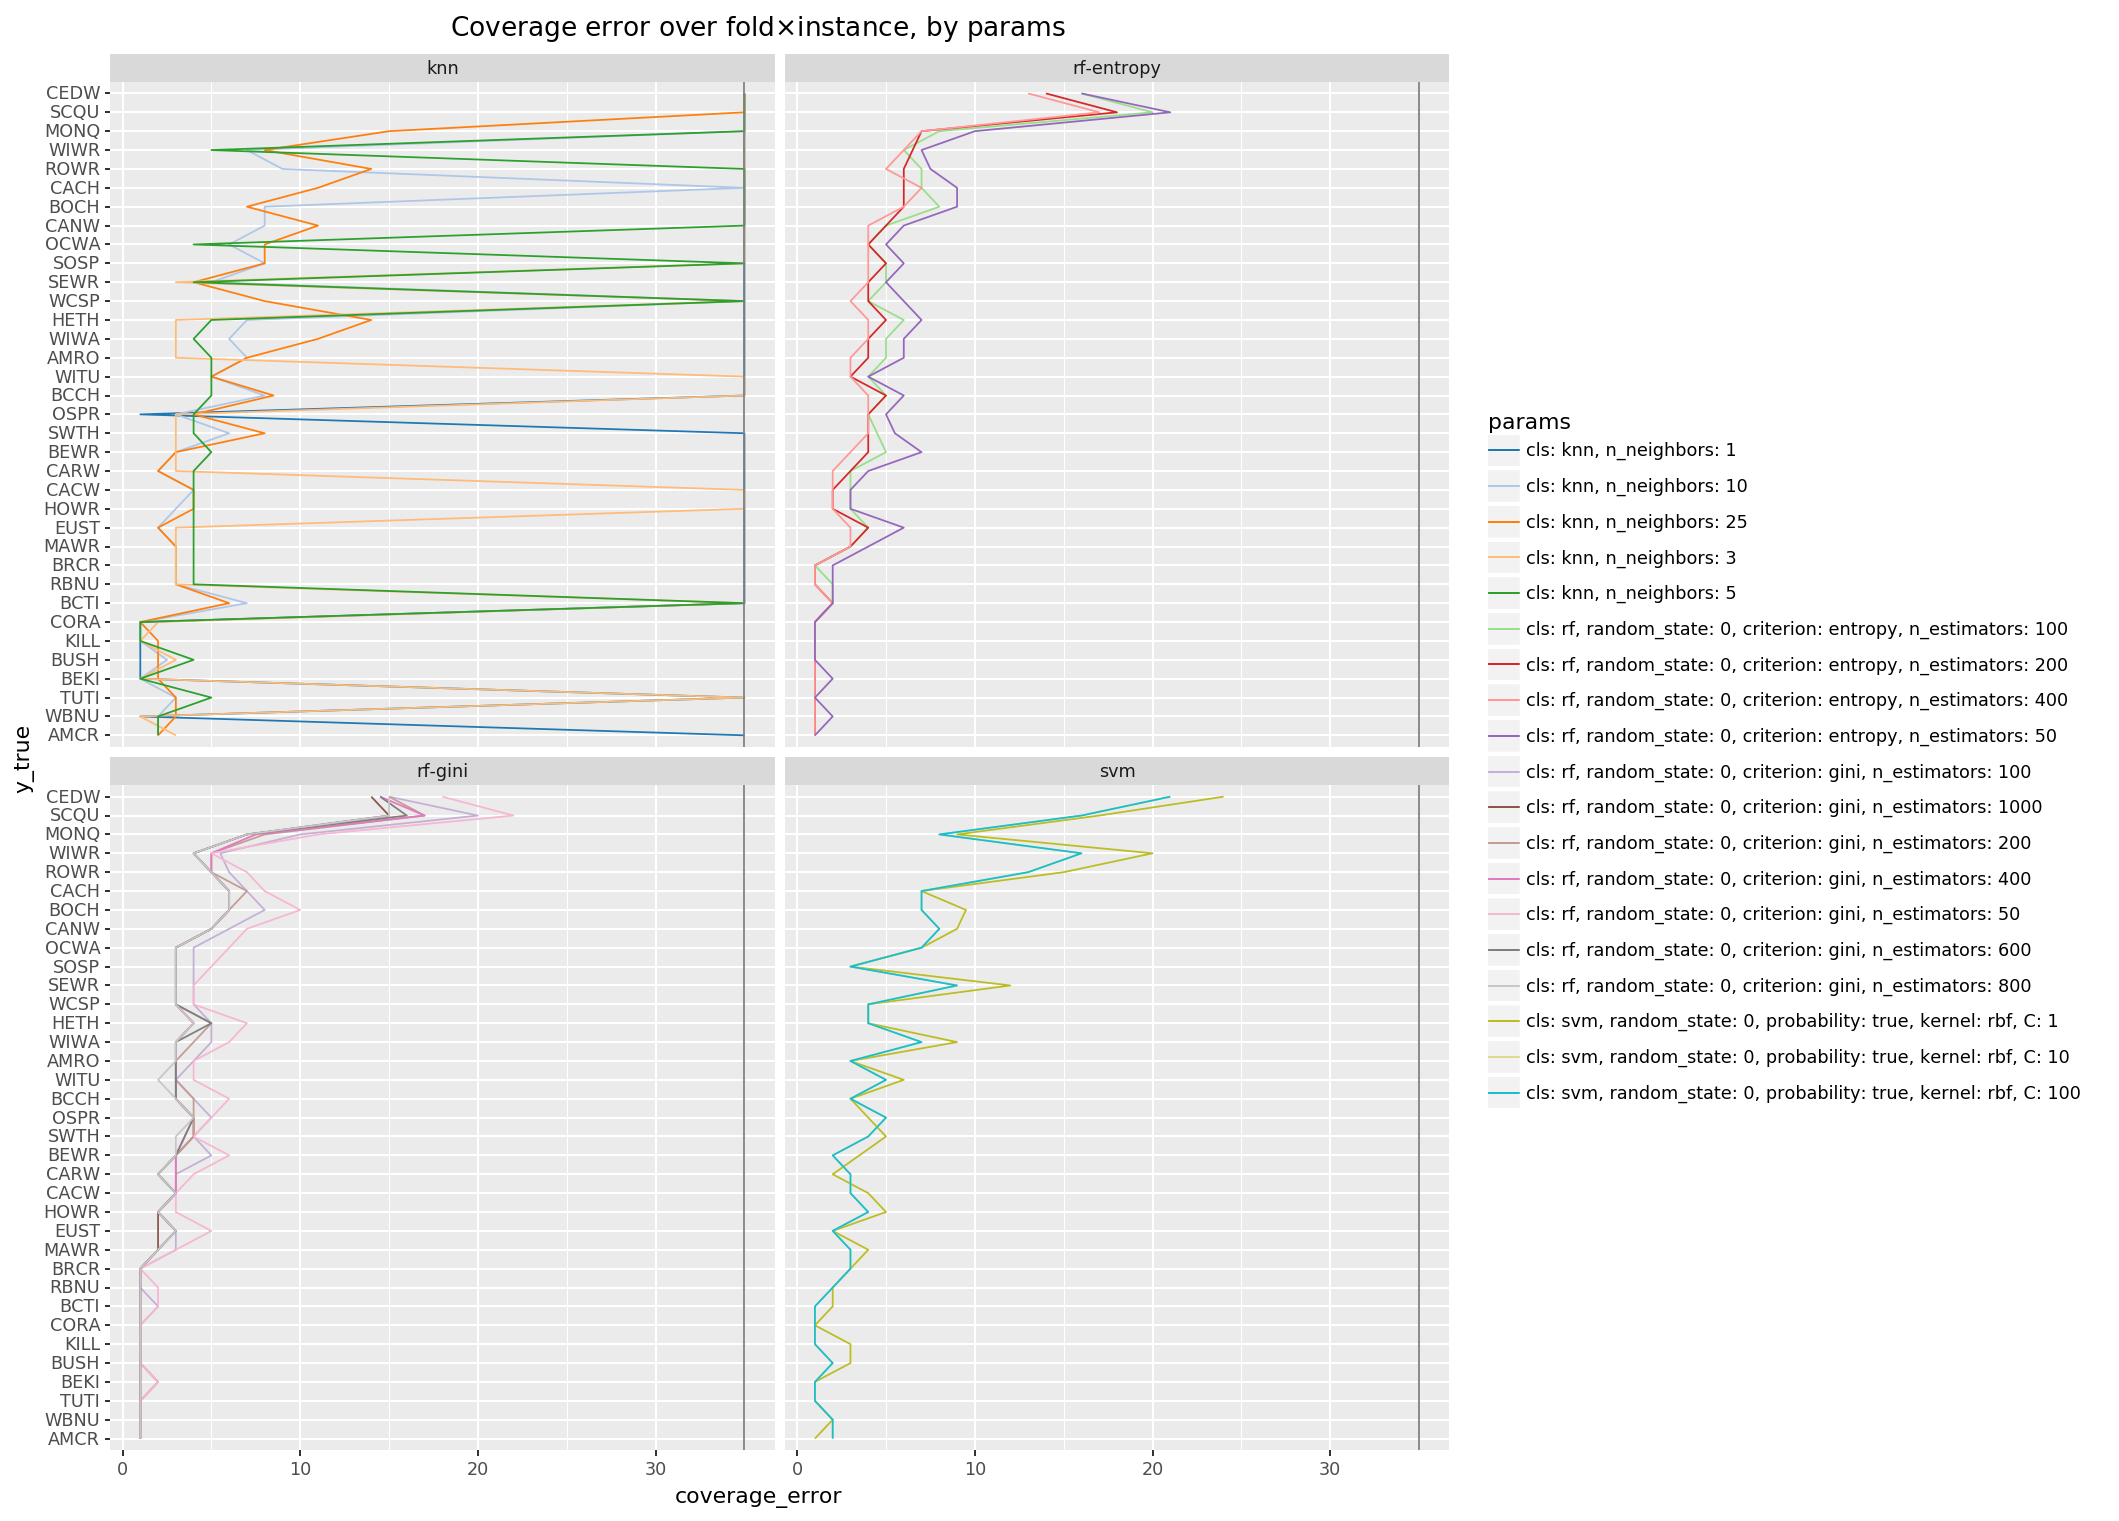

<ggplot: (309907134)>

In [ ]:
# Facet by classifier_type, order by median(coverage_error)
#   - Subset: all models
#   - Grain: sum(recs[model.test_i].groupby(params, y_true) for model)
#       - Over: fold, rec_id
#   - Dims: params, y_true
#   - Metrics: coverage_error.median
# in: coverage_errors_all_all, recs
(coverage_errors_all_all
    # Sort species by median(coverage_error) (across all models)
    .pipe(df_ordered_cat, y_true=lambda df: (
        df.groupby('y_true').agg({'coverage_error': np.median}).reset_index().sort_values('coverage_error').y_true
    ))
    .pipe(ggplot, aes(x='y_true', y='coverage_error', color='params'))
    + facet_wrap('classifier_type')
    + geom_line(aes(group='params'), stat='summary', fun_y=np.median)
    + coord_flip()
    + geom_hline(yintercept=recs.species.nunique(), color='grey')
    + scale_color_cmap_d(mpl.cm.tab20)
    + theme_figsize('square')
    + ggtitle(rf'Coverage error over fold$\times$instance, by params')
)

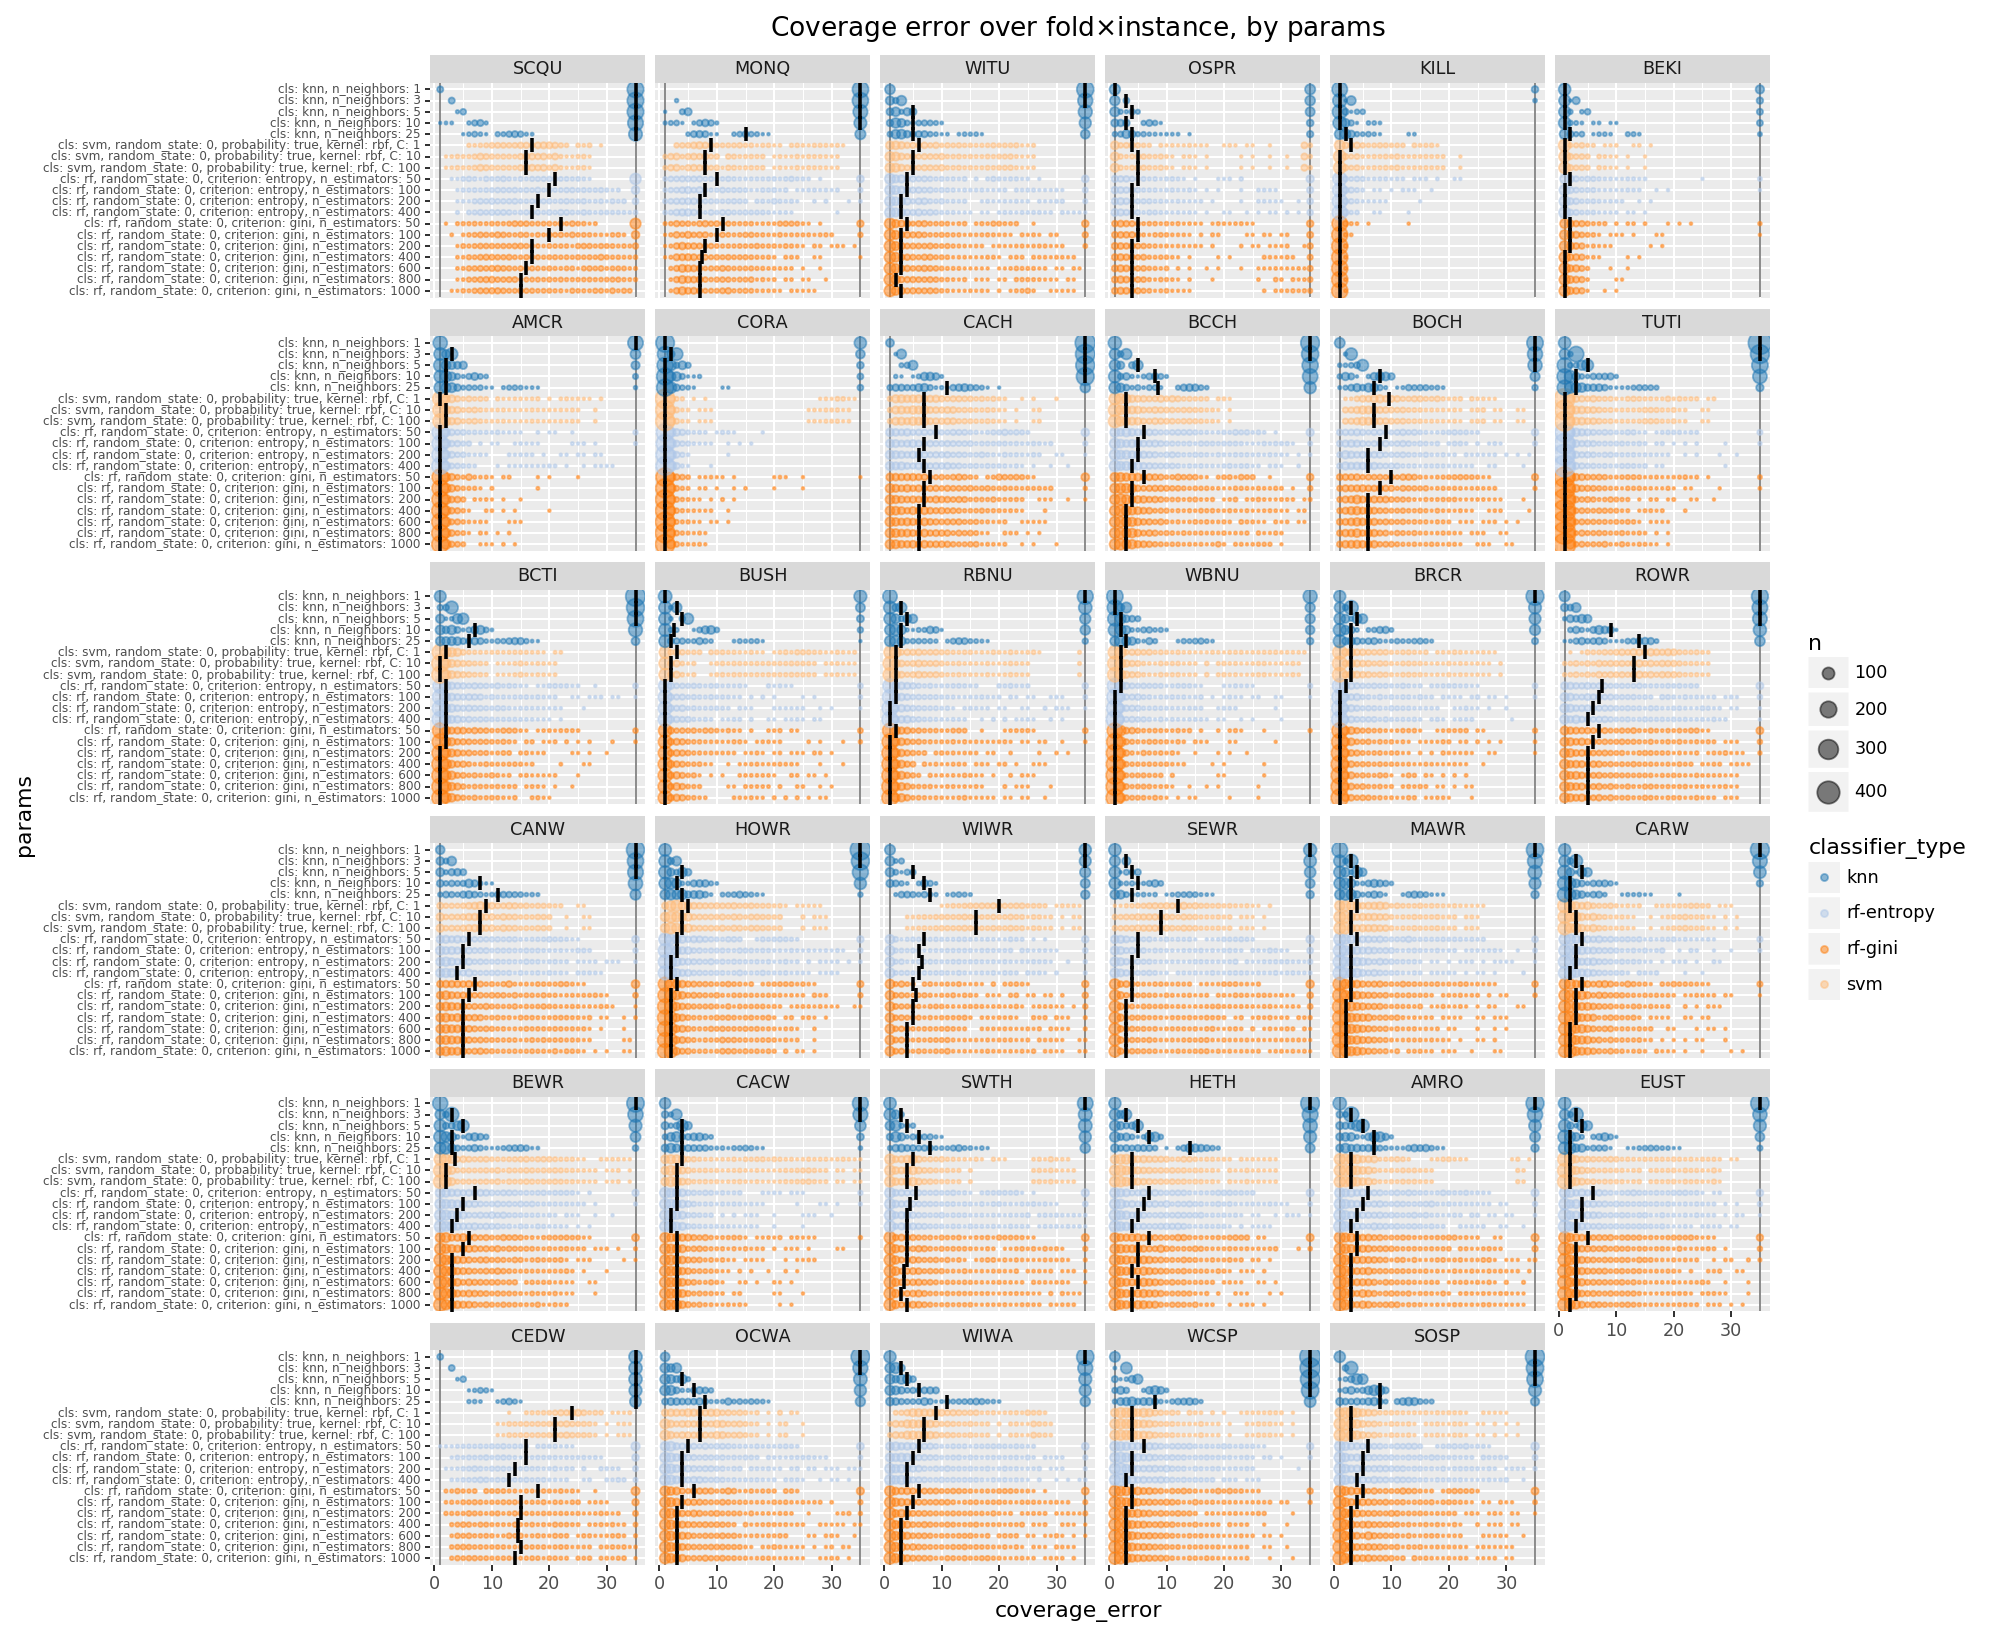

<ggplot: (-9223372036542971157)>

In [ ]:
# TODO Slow, bad for notebook dev loop -- move lower, or disable by default?
# Facet by species
#   - Subset: all models
#   - Grain: sum(recs[model.test_i].groupby(params, y_true) for model)
#       - Over: fold, rec_id
#   - Dims: params, y_true
#   - Metrics: coverage_error.median
# in: coverage_errors_all_all, recs
(coverage_errors_all_all
    # .sample(200, random_state=0)  # Faster dev
    .astype({'y_true': metadata.species.df.shorthand.dtype})
    .pipe(df_ordered_cat, params=lambda df: reversed(param_grid['classifier']))
    .pipe(ggplot, aes(x='params', y='coverage_error', color='classifier_type'))
    + facet_wrap('y_true')
    + geom_hline(yintercept=1, color='grey')
    + geom_hline(yintercept=recs.species.nunique(), color='grey')

    # Percentiles (faster, no overplot)
    # + geom_point(stat='summary', fun_y=np.median)
    # + geom_linerange(stat='summary', fun_ymin=partial(np.percentile, q=25), fun_ymax=partial(np.percentile, q=75))

    # Violin (slow, no overplot)
    # + geom_violin()

    # Boxplot (very slow, no overplot)
    # + geom_boxplot()

    # Points (medium cost, high overplot)
    #   - n (count) instead of prop (proportion)
    #   - scale_size_area() instead of default scale_size(), because it's a count [I don't grok this but it looks good]
    + geom_count(aes(size='..n..'), alpha=.5)
    + scale_size_area()
    + geom_point(stat='summary', fun_y=np.median, alpha=1, color='black', shape='|', size=3, stroke=1)

    + coord_flip()
    + scale_color_cmap_d(mpl.cm.tab20)
    + theme(axis_text_y=element_text(size=6))
    + theme_figsize('square')  # Faster
    # + theme_figsize('half')
    # + theme_figsize('full')
    + ggtitle(rf'Coverage error over fold$\times$instance, by params')
)

# Model diagnostics: one model, all folds

In [ ]:
params_i = 18
params = param_grid['classifier'][params_i]
print("param_grid['classifier']:\n%s" % '\n'.join('  %s: %r' % (i, x) for i, x in enumerate(param_grid['classifier'])))
print()
print('models:')
print('  params[%s/%s]: %r' % (params_i, len(param_grid['classifier']), params))
print('  fold[*/%s]' % cv.cv.n_splits)

param_grid['classifier']:
  0: 'cls: knn, n_neighbors: 1'
  1: 'cls: knn, n_neighbors: 3'
  2: 'cls: knn, n_neighbors: 5'
  3: 'cls: knn, n_neighbors: 10'
  4: 'cls: knn, n_neighbors: 25'
  5: 'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 1'
  6: 'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 10'
  7: 'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 100'
  8: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 50'
  9: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 100'
  10: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 200'
  11: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 400'
  12: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 50'
  13: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 100'
  14: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 200'
  15: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 400'
  16: 'cls: rf, random_state: 0, cri

In [ ]:
# Coverage errors: one model, all folds
#   - Subset: models.params == params
#   - Grain: sum(recs[model.test_i] for model)
#   - Dims: model_id, params, fold, y_true, rec_id
#   - Metrics: coverage_error
coverage_errors_one_all = (coverage_errors_all_all
    [lambda df: df.params == params]  # One model, all folds
)
display(
    df_summary(coverage_errors_one_all).T,
    coverage_errors_one_all[:10],
)

min                                                                      25%                                                                      50%                                                                      75%                                                                      max
                dtype   sizeof  len   count nunique mean std                                                                                                                                                                                                                                                                                                                                                                            
model_id        object  1313746 10700 10700 100     NaN  NaN  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 30  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 53  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 76  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 99
params          object  3830600 10700 10700 1       NaN  NaN           cls: rf, random_state: 0, criterion: gini, n_estimators: 1000            cls: rf, random_state: 0, criterion: gini, n_estimators: 1000            cls: rf, random_state: 0, criterion: gini, n_estimators: 1000            cls: rf, random_state: 0, criterion: gini, n_estimators: 1000            cls: rf, random_state: 0, criterion: gini, n_estimators: 1000
classifier_type object  599200  10700 10700 1       NaN  NaN                                                                 rf-gini                                                                  rf-gini                                                                  rf-gini                                                                  rf-gini                                                                  rf-gini
fold            int64   299172  10700 10700 100     NaN  NaN                                                                       0                                                                       24                                                                       49                                                                       74                                                                       99
i               int64   299524  10700 10700 535     NaN  NaN                                                                       0                                                                      132                                                                      264                                                                      400                                                                      534
y_true          object  909500  10700 10700 35      NaN  NaN                                                                    AMCR                                                                     BUSH                                                                     HOWR                                                                     SEWR                                                                     WIWR
coverage_error  float64 256800  10700 10700 35      NaN  NaN                                                                       1                                                                        1                                                                        2                                                                        6                                                                       35

model_id                                                         params classifier_type  fold    i y_true  coverage_error
192600  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  172   BCTI             1.0
192601  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  464   CEDW            13.0
192602  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  196   BUSH             3.0
192603  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  414   HETH             3.0
192604  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  531   SOSP             2.0
192605  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  210   RBNU             4.0
192606  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  485   WIWA             9.0
192607  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  236   BRCR             1.0
192608  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  419   HETH             2.0
192609  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  162   TUTI             2.0

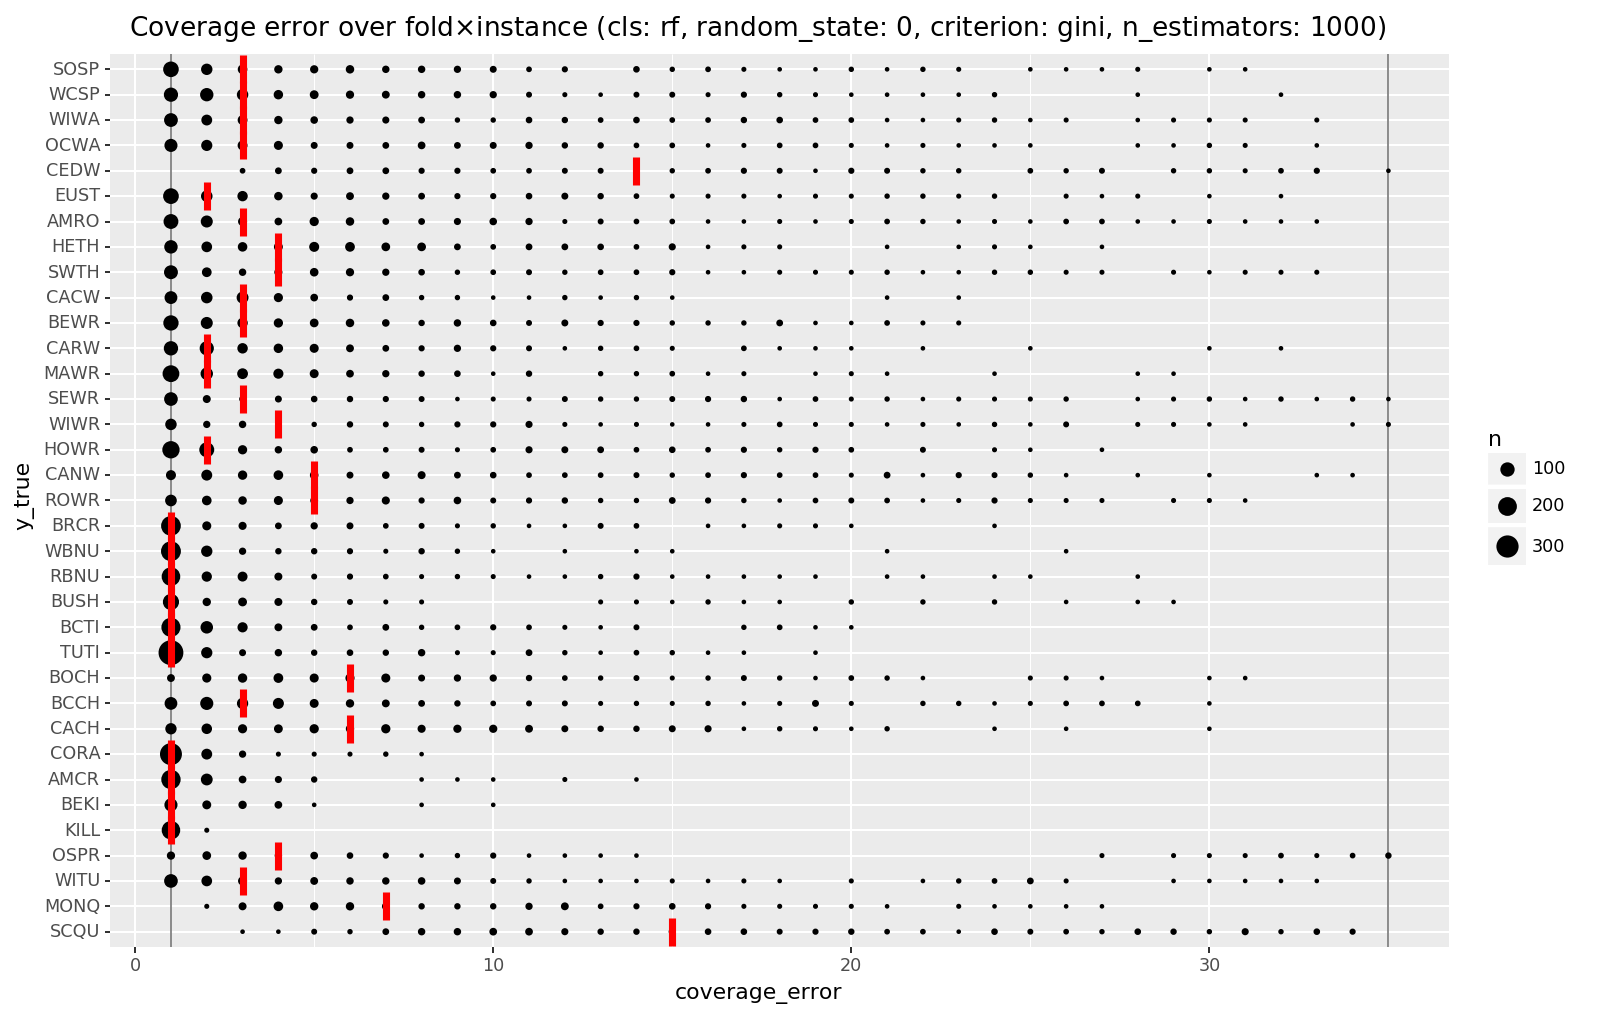

<ggplot: (330693247)>

In [ ]:
#   - Subset: models.params == params
#   - Grain: sum(recs[model.test_i].groupby(y_true) for model)
#       - Over: fold, rec_id
#   - Dims: y_true
#   - Metrics: count, coverage_error.percentiles
# in: coverage_errors_one_all, recs
(coverage_errors_one_all
    .astype({'y_true': metadata.species.df.shorthand.dtype})
    .pipe(df_ordered_cat, params=lambda df: reversed(param_grid['classifier']))
    .pipe(ggplot, aes(x='y_true', y='coverage_error'))
    + geom_hline(yintercept=1, color='grey')
    + geom_hline(yintercept=recs.species.nunique(), color='grey')
    + geom_count(aes(size='..n..'), alpha=1)  # n (count) instead of prop (proportion)
    + scale_size_area()  # Instead of default scale_size(), because it's a count [I don't grok this but it looks good]
    + geom_point(stat='summary', fun_y=np.median, alpha=1, color='red', shape='|', size=6, stroke=2)
    + coord_flip()
    + theme_figsize('inline')
    + ggtitle(rf'Coverage error over fold$\times$instance ({params})')
)

In [ ]:
(coverage_errors_one_all
    [:5]
)

model_id                                                         params classifier_type  fold    i y_true  coverage_error
192600  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  172   BCTI             1.0
192601  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  464   CEDW            13.0
192602  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  196   BUSH             3.0
192603  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  414   HETH             3.0
192604  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000; fold: 0  cls: rf, random_state: 0, criterion: gini, n_estimators: 1000         rf-gini     0  531   SOSP             2.0

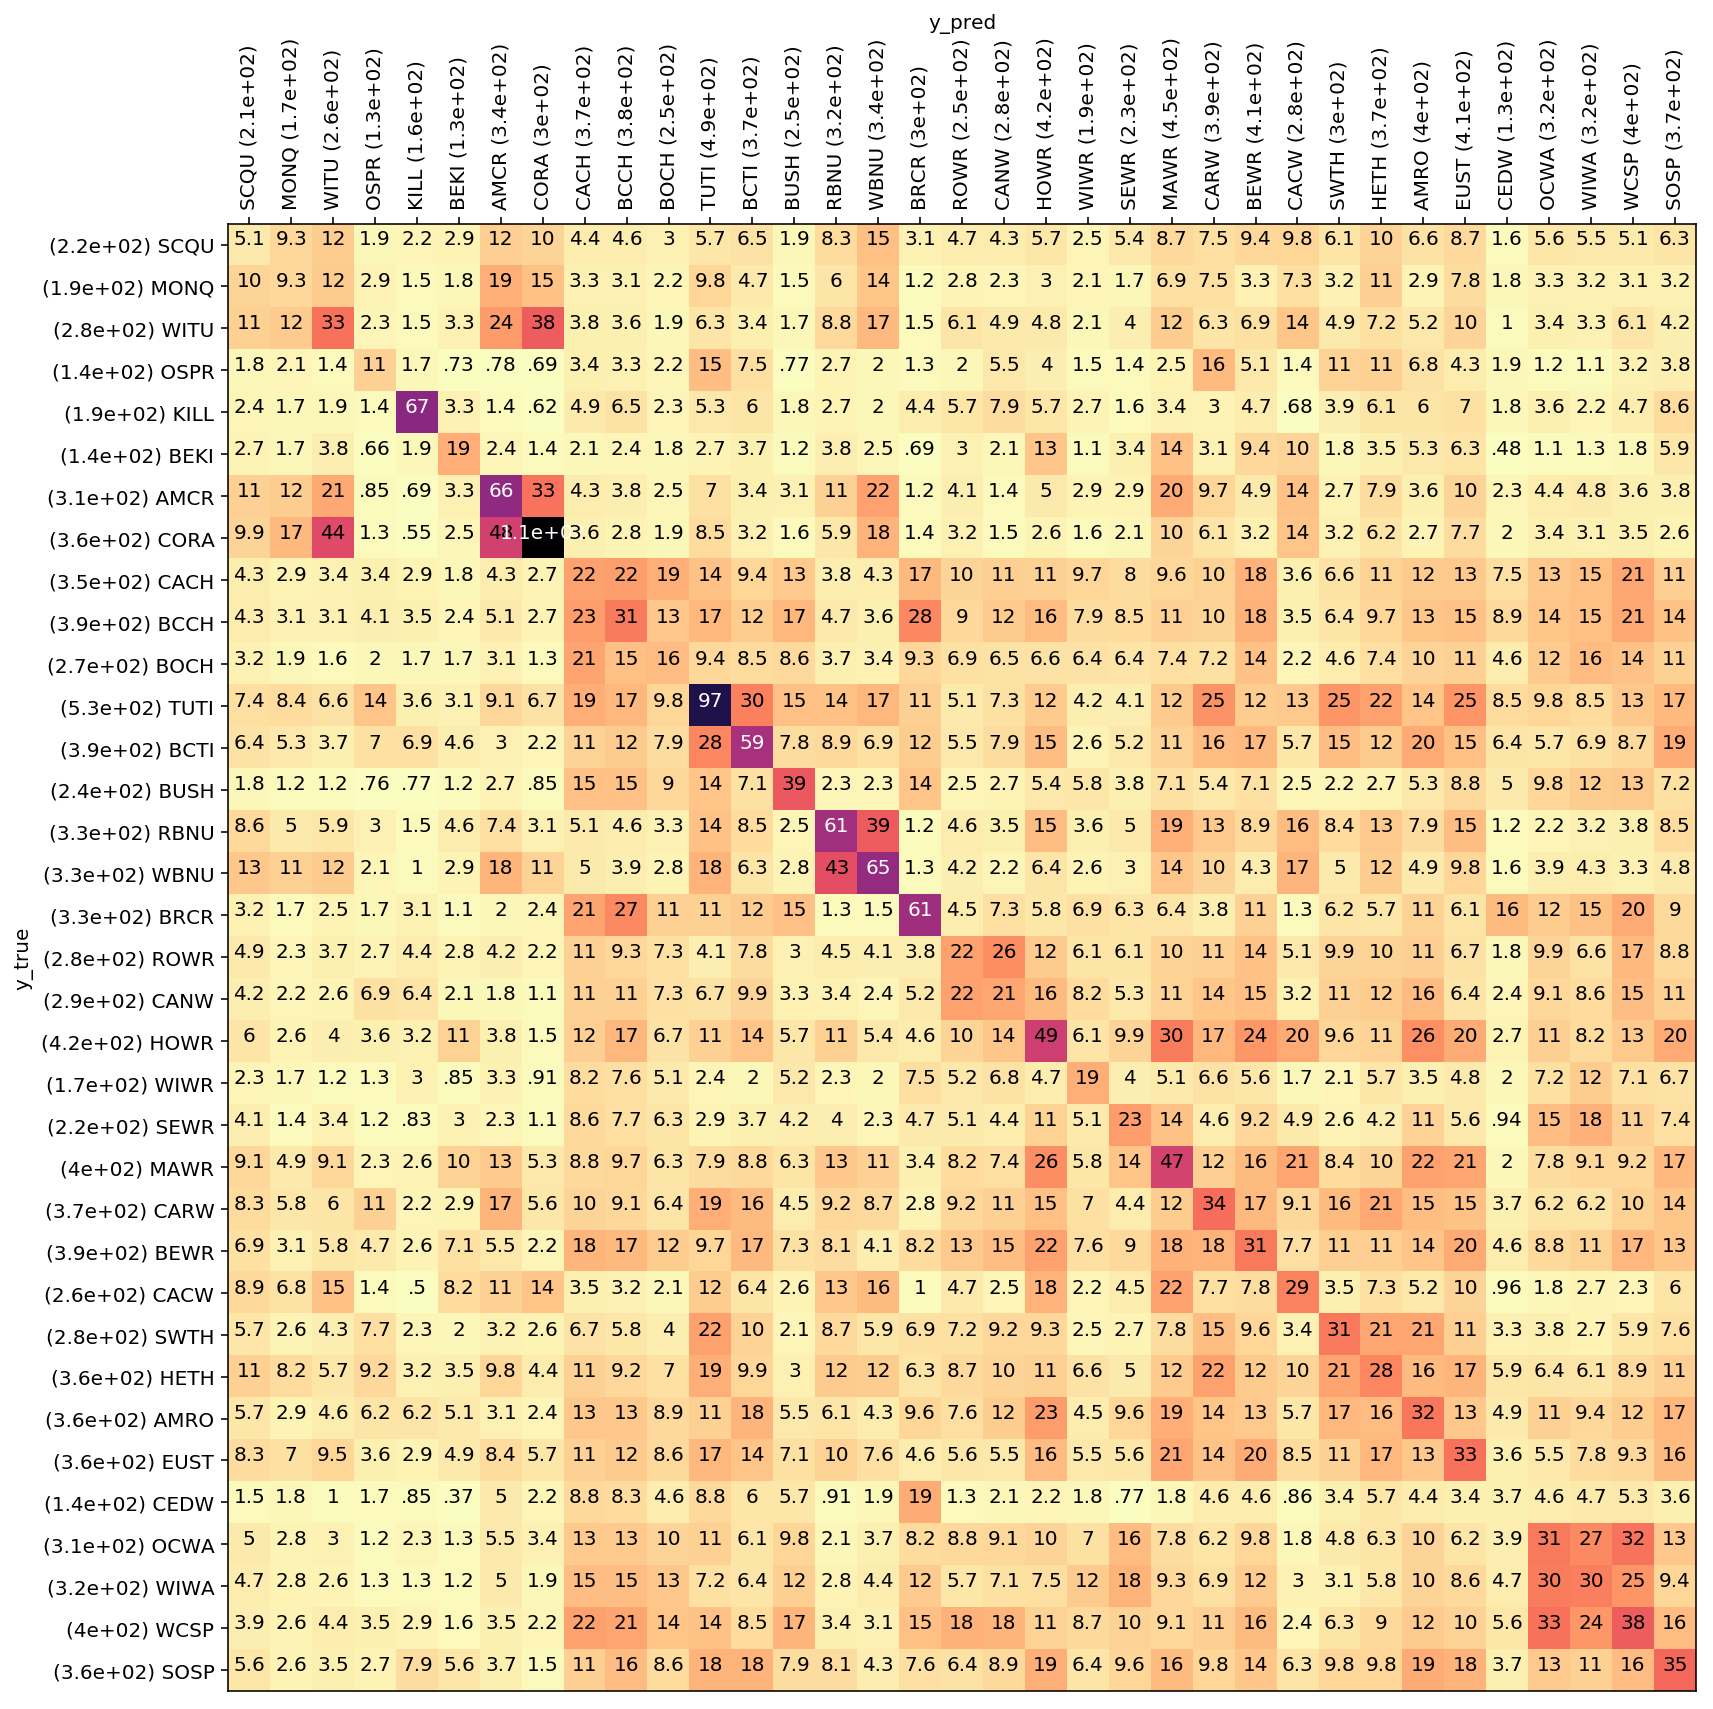

In [ ]:
# One-model/all-folds confusion matrix
with figsize('square'):
    (cv_models
        [lambda df: df.params == params]
        .pipe(lambda df: plot_confusion_matrix(
            classes=df.iloc[0].test_evals.classes,
            M=np.array([
                row.test_evals.confusion_matrix_prob()
                for row in df_rows(df)
            ]).sum(axis=0),
            # raw=True, scale=10,  # Faster dev
        ))
    )

# Model diagnostics: one model, one fold

In [ ]:
fold = 0
# params_i = ...  # Comment out to reuse from above
params = param_grid['classifier'][params_i]
[(_, model)] = list(cv_models[lambda df: (df.params == params) & (df.fold == fold)].iterrows())
print("param_grid['classifier']:\n%s" % '\n'.join('  %s: %r' % (i, x) for i, x in enumerate(param_grid['classifier'])))
print()
print('model:')
print('  params[%s/%s]: %r' % (params_i, len(param_grid['classifier']), model.params))
print('  fold[%s/%s]' % (model.fold, cv.cv.n_splits))
print()
print(model)

param_grid['classifier']:
  0: 'cls: knn, n_neighbors: 1'
  1: 'cls: knn, n_neighbors: 3'
  2: 'cls: knn, n_neighbors: 5'
  3: 'cls: knn, n_neighbors: 10'
  4: 'cls: knn, n_neighbors: 25'
  5: 'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 1'
  6: 'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 10'
  7: 'cls: svm, random_state: 0, probability: true, kernel: rbf, C: 100'
  8: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 50'
  9: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 100'
  10: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 200'
  11: 'cls: rf, random_state: 0, criterion: entropy, n_estimators: 400'
  12: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 50'
  13: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 100'
  14: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 200'
  15: 'cls: rf, random_state: 0, criterion: gini, n_estimators: 400'
  16: 'cls: rf, random_state: 0, cri

In [ ]:
# in: model
model_id = model.model_id
params = model.params
fold = model.fold
# train_evals = model.train_evals
test_evals = model.test_evals

# in: model, recs
# train_recs = recs.iloc[train_evals.i]
# train_X = Search.X(recs)[train_evals.i]
# train_y = Search.y(recs)[train_evals.i]
test_recs = recs.iloc[test_evals.i]
test_X = Search.X(recs)[test_evals.i]
test_y = Search.y(recs)[test_evals.i]  # (Don't need to store cv_models.test_evals.y if we have recs -- which sometimes we don't?)

display(
    # len(train_recs),
    len(test_recs),
)

107

In [ ]:
# TODO TODO What's worth recovering here, given the plots above?
# # TODO Update [kill the .merge, then species -> y_true]
# (search.coverage_error_by(test_recs, 'id')
#     [:5]
#     # .merge(test_recs[['id', 'species']], on='id', how='left')
#     # .pipe(ggplot, aes(x='species', y='coverage_error'))
#     # + geom_count(aes(size='..n..'))
#     # + stat_summary(fun_y=np.median, geom='point', color='red', alpha=.5, shape='|', size=6, stroke=1)
#     # + stat_summary(
#     #     fun_ymin=partial(np.percentile, q=25), fun_ymax=partial(np.percentile, q=75), geom='linerange', color='red', alpha=.5, size=1,
#     # )
#     # + coord_flip()
#     # + geom_hline(yintercept=len(search.classes_), color='grey')
#     # + scale_x_discrete(limits=list(reversed(test_recs.species.cat.categories)))
#     # + theme_figsize('square')
#     # + ggtitle(rf'Coverage error over instance ({model_id})')
# )

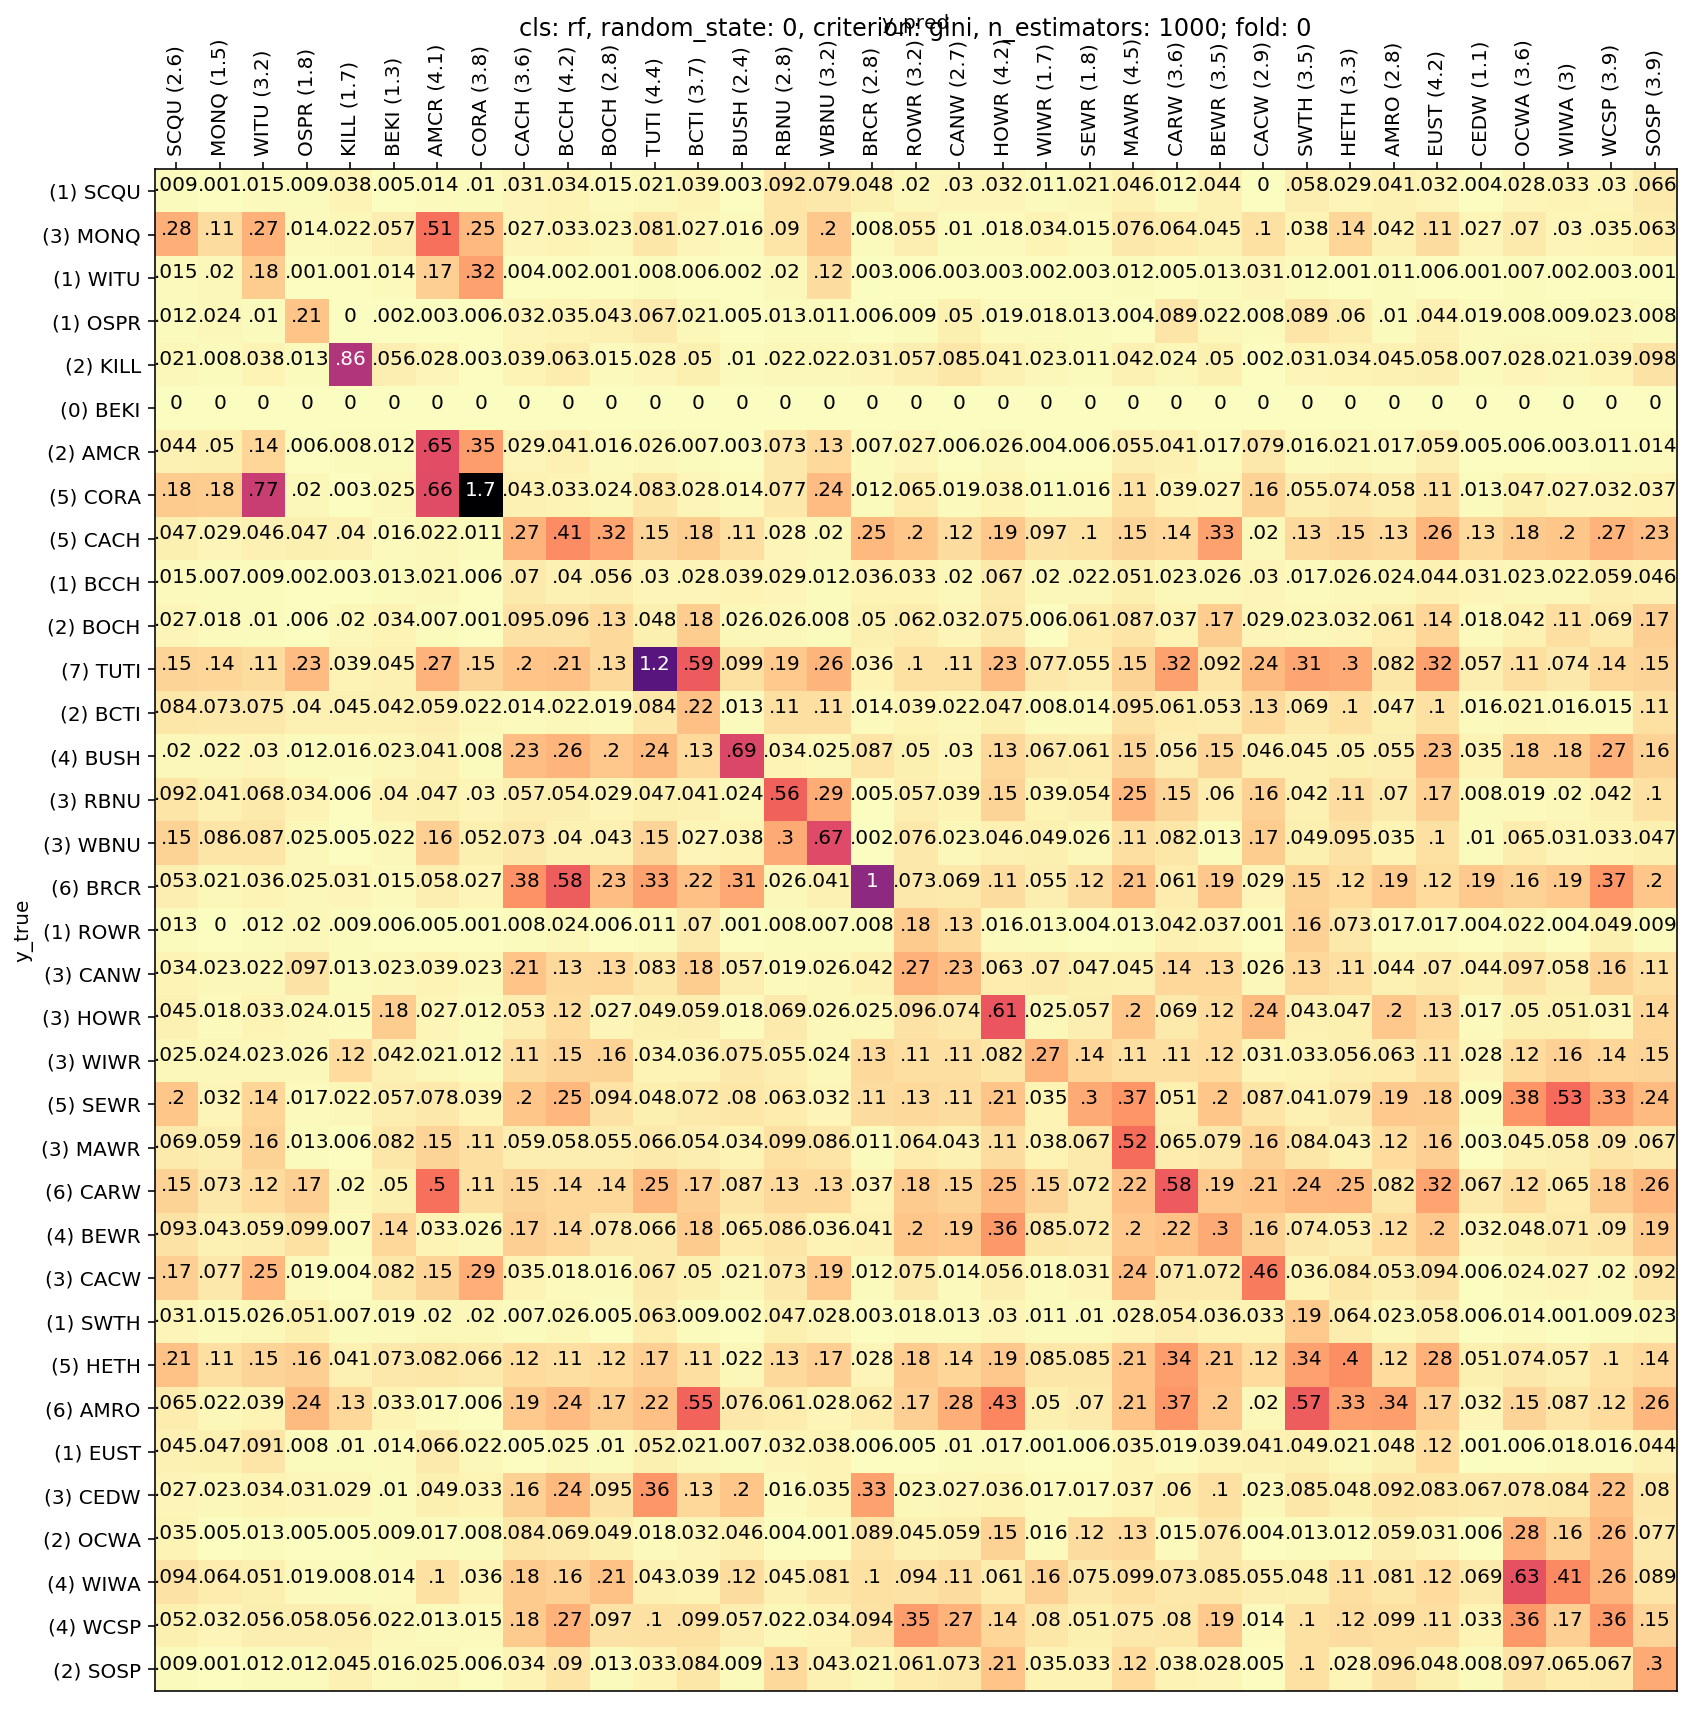

In [ ]:
# One-model/one-fold confusion matrix
with figsize('square'):
    plot_confusion_matrix_df(
        confusion_matrix_prob_df(model.test_evals.y, model.test_evals.y_scores, model.test_evals.classes),
        title=model.model_id,
    )